# Project Overview

This project involves the classification of PIR sensor data combined with contextual tabular features (e.g., temperature and time) to detect human activity or environmental conditions. The dataset contains time-series data from multiple PIR sensors (`PIR_1` to `PIR_55`) and additional features like temperature and time. The goal is to build robust machine learning models that can classify the data into three distinct labels:

- **Label 0**: Vacancy
- **Label 1**: Stationary human presence
- **Label 2**: Other activity/motion

The project follows a structured pipeline, including data preprocessing, feature engineering, exploratory data analysis (EDA), and the development of multiple deep learning models. Each model is evaluated using 5-fold cross-validation to ensure generalization.

---

## Project Summary Table

| **Step**                       | **Description**                                                                                     | **Key Outputs**                                                                 |
| ------------------------------ | --------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **1. Data Loading**            | Loaded the PIR sensor dataset and performed initial inspection.                                     | Dataset loaded into a Pandas DataFrame.                                         |
| **2. EDA**                     | Explored the dataset for class imbalance, feature distributions, and outliers.                      | Boxplots, histograms, and descriptive statistics.                               |
| **3. Outlier Handling**        | Replaced outliers in `PIR_1` with the median value to ensure uniformity across PIR columns.         | Cleaned dataset with consistent PIR sensor distributions.                       |
| **4. Feature Engineering**     | Engineered cyclical time features (`Hour_sin`, `Hour_cos`, etc.) and normalized temperature values. | Enhanced dataset with additional features for temporal and contextual patterns. |
| **5. Feature Scaling**         | Applied `MinMaxScaler` to PIR columns and `StandardScaler` to temperature for model compatibility.  | Scaled dataset ready for training.                                              |
| **6. Model 1: LSTM**           | Built an LSTM-based model to capture temporal dependencies in PIR sensor data.                      | Achieved ~95% accuracy with strong generalization.                              |
| **7. Model 2: LSTM + Tabular** | Combined LSTM for PIR data with a dense block for tabular features.                                 | Improved accuracy (~98%) by leveraging both modalities.                         |
| **8. Model 3: CNN**            | Developed a 1D-CNN model to extract local temporal patterns from PIR data.                          | Achieved ~95% accuracy with computational efficiency.                           |
| **9. Model 4: CNN + Tabular**  | Combined CNN for PIR data with a dense block for tabular features.                                  | Achieved ~98-99% accuracy with excellent generalization.                           |
| **10. Evaluation**             | Evaluated all models using 5-fold cross-validation and analyzed class-wise performance.             | Metrics: Accuracy, Macro F1-Score, Confusion Matrix.                            |
| **11. Insights**               | Summarized key findings, including class-wise performance and feature importance.                   | Identified strong correlation between temperature and Label 2.                  |

---

## Key Takeaways

1. **Hybrid Models Perform Best**: Combining PIR time-series data with tabular features significantly improves classification accuracy.
2. **Class Imbalance Challenges**: Class 1 (Stationary human presence) is the most challenging to classify due to overlap with other classes.
3. **Feature Importance**: Temperature and cyclical time features play a crucial role in distinguishing between classes.
4. **Generalization**: All models demonstrate strong generalization, with minimal overfitting observed during training.

This structured approach ensures a comprehensive understanding of the dataset and robust model performance.


## Data loading, preprocessing and feature engineering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# if using google colab
#from google.colab import drive
#drive.mount('/content/drive')
#dataset_path = "/content/drive/MyDrive/DL_Project/pirvision_office_dataset1.csv"

# if using anaconda
dataset_path = "C:\\Users\\aparna\\Downloads\\pirvision_fog_presence_detection\\pirvision_office_dataset1.csv"

# loading dataset
df = pd.read_csv(dataset_path)
df.head()

,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
0,2024-08-08,19:19:56,0,86,10269,10721,11156,11170,10931,10671,...,11178,11197,11161,11096,10957,10839,10735,10590,10411,10329
1,2024-08-08,19:20:12,1,86,10364,10907,11299,11238,10867,10535,...,11122,11145,11136,11108,11041,10824,10645,10493,10398,10357
2,2024-08-08,19:20:28,0,86,10329,10793,11197,11242,11052,10658,...,11168,11204,11162,11109,11007,10867,10700,10533,10427,10265
3,2024-08-08,19:20:44,0,86,10169,10425,10822,11133,11136,10834,...,11116,11273,11186,10984,10910,10807,10714,10651,10562,10463
4,2024-08-08,19:21:00,0,86,10320,10667,11104,11234,11129,10814,...,11006,11257,11370,11173,10924,10816,10754,10588,10428,10407


In [2]:
df

,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
0,2024-08-08,19:19:56,0,86,10269,10721,11156,11170,10931,10671,...,11178,11197,11161,11096,10957,10839,10735,10590,10411,10329
1,2024-08-08,19:20:12,1,86,10364,10907,11299,11238,10867,10535,...,11122,11145,11136,11108,11041,10824,10645,10493,10398,10357
2,2024-08-08,19:20:28,0,86,10329,10793,11197,11242,11052,10658,...,11168,11204,11162,11109,11007,10867,10700,10533,10427,10265
3,2024-08-08,19:20:44,0,86,10169,10425,10822,11133,11136,10834,...,11116,11273,11186,10984,10910,10807,10714,10651,10562,10463
4,2024-08-08,19:21:00,0,86,10320,10667,11104,11234,11129,10814,...,11006,11257,11370,11173,10924,10816,10754,10588,10428,10407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,2024-10-08,04:34:17,0,88,10648,11474,11989,11891,11424,10861,...,11873,11947,11856,11725,11562,11335,11129,10820,10599,10438
7647,2024-10-08,04:34:33,0,88,10412,11083,11796,12000,11612,10999,...,11785,11948,11912,11811,11652,11430,11103,10829,10614,10465
7648,2024-10-08,04:34:49,0,88,10412,10780,11555,11860,11541,11101,...,11690,11815,11813,11746,11573,11395,11222,11070,10909,10696
7649,2024-10-08,04:35:05,0,88,10697,11502,12022,11957,11436,10794,...,11895,11989,11898,11672,11506,11189,10866,10700,10509,10426


In [3]:
# Checking if class imbalance is there?
print(df['Label'].value_counts())

0    6247
1     833
3     571
Name: Label, dtype: int64


In [4]:
# Checking Temp distribution
print(df['Temperature_F'].describe())

count    7651.000000
mean       80.383871
std        22.861417
min         0.000000
25%        86.000000
50%        86.000000
75%        88.000000
max        89.000000
Name: Temperature_F, dtype: float64


In [5]:
# Checking for all PIR columns distribution
pir_columns = [col for col in df.columns if col.startswith('PIR_')]
print(df[pir_columns].describe())

              PIR_1         PIR_2         PIR_3         PIR_4         PIR_5  \
count  7.651000e+03   7651.000000   7651.000000   7651.000000   7651.000000   
mean   2.501256e+05  11013.891648  11517.838452  11578.490786  11269.104169   
std    4.292998e+06    591.799276    656.683841    663.111916    605.936126   
min    2.613000e+03   2615.000000   2614.000000   2611.000000   2612.000000   
25%    1.033300e+04  10787.500000  11272.500000  11338.000000  11051.000000   
50%    1.043100e+04  11002.000000  11557.000000  11629.000000  11301.000000   
75%    1.056050e+04  11267.000000  11885.000000  11957.000000  11550.000000   
max    1.116026e+08  16383.000000  16383.000000  16383.000000  16383.000000   

              PIR_6         PIR_7         PIR_8         PIR_9        PIR_10  \
count   7651.000000   7651.000000   7651.000000   7651.000000   7651.000000   
mean   10795.036989  10312.208600   9907.840413   9610.574958   9421.211214   
std      537.247861    501.407122    499.632397    

### Observation:

Found distribution of PIR_1 to be different w.r.t. other PIR columns, even if all the PIR columns measure same quantity


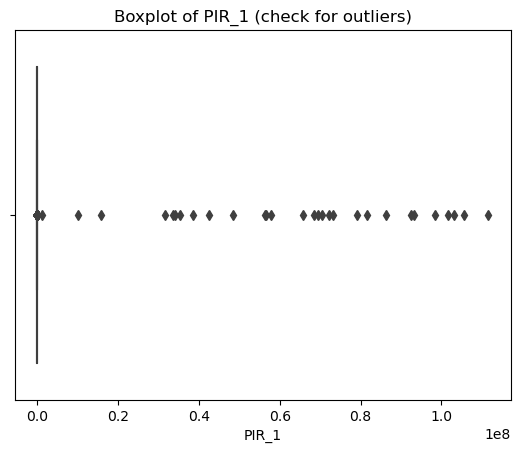

In [6]:
import seaborn as sns

sns.boxplot(x=df['PIR_1'])
plt.title("Boxplot of PIR_1 (check for outliers)")
plt.show()

In [7]:
# Find rows with extremely high PIR_1 values (outliers)
outliers = df[df['PIR_1'] > 16383]  # highest value of other PIR columns
print(outliers[['PIR_1']])

          PIR_1
74      1092995
98      9994068
112    15766628
145    31511975
153    34137618
157    35187163
177    42533717
192    48307613
3906   98481113
3917  101630723
3922  103203717
3940  111602625
4134   79012219
4301   38549981
4339   56393789
4366   69514713
4377   73187169
4423   93130779
4623   65789689
4632   68415765
4639   70515126
4645   72087872
4669   81535651
4686   86257719
4708   92556366
4743  105677282
5580   33580549
5628   56673485
5632   57722896


In [8]:
outliers

,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
74,2024-08-08,19:38:48,3,0,1092995,12204,11501,10481,9464,8533,...,8641,8452,8452,8490,8490,8807,8807,9369,9369,9972
98,2024-08-08,19:43:19,3,0,9994068,11186,11054,10884,10734,10476,...,11004,10778,10778,10549,10549,10311,10311,10142,10142,9896
112,2024-08-08,19:46:15,3,0,15766628,11560,11869,12166,12323,12312,...,11511,11248,11248,10882,10882,10445,10445,9997,9997,9652
145,2024-08-08,19:54:15,3,0,31511975,9655,9751,9855,9868,9929,...,12414,11548,11548,10586,10586,9787,9787,9161,9161,8656
153,2024-08-08,19:55:35,3,0,34137618,10577,10630,10735,10896,10959,...,7011,8114,8114,9524,9524,11000,11000,12400,12400,13698
157,2024-08-08,19:56:08,3,0,35187163,8776,8763,8872,9111,9475,...,10029,8697,8697,7462,7462,6628,6628,6238,6238,6464
177,2024-08-08,19:59:52,3,0,42533717,10063,10139,10258,10285,10395,...,12139,12030,12030,11609,11609,11003,11003,10100,10100,9230
192,2024-08-08,20:02:48,3,0,48307613,12255,12558,12635,12439,11832,...,11044,10884,10884,10779,10779,10590,10590,10404,10404,10344
3906,2024-09-08,12:29:02,3,0,98481113,10462,10454,10469,10359,10265,...,10686,10661,10661,10503,10503,10342,10342,10155,10155,10084
3917,2024-09-08,12:30:38,3,0,101630723,12421,11556,10251,8392,6501,...,11768,11471,11471,11226,11226,11014,11014,10733,10733,10415


### Replacing the outliers with median value, so that we get uniform distribution of all PIR columns as they are measuring same value.


In [2]:
# Replacing PIR_1 values > 16383 with median of valid values
valid_values = df[df['PIR_1'] <= 16383]['PIR_1']
df.loc[df['PIR_1'] > 16383, 'PIR_1'] = valid_values.median()

pir_columns = [col for col in df.columns if col.startswith('PIR_')]
print(df[pir_columns].describe())

              PIR_1         PIR_2         PIR_3         PIR_4         PIR_5  \
count   7651.000000   7651.000000   7651.000000   7651.000000   7651.000000   
mean   10451.259705  11013.891648  11517.838452  11578.490786  11269.104169   
std      488.114683    591.799276    656.683841    663.111916    605.936126   
min     2613.000000   2615.000000   2614.000000   2611.000000   2612.000000   
25%    10333.000000  10787.500000  11272.500000  11338.000000  11051.000000   
50%    10430.000000  11002.000000  11557.000000  11629.000000  11301.000000   
75%    10558.000000  11267.000000  11885.000000  11957.000000  11550.000000   
max    16383.000000  16383.000000  16383.000000  16383.000000  16383.000000   

              PIR_6         PIR_7         PIR_8         PIR_9        PIR_10  \
count   7651.000000   7651.000000   7651.000000   7651.000000   7651.000000   
mean   10795.036989  10312.208600   9907.840413   9610.574958   9421.211214   
std      537.247861    501.407122    499.632397    

### PIR Sensor Feature Statistics

To ensure that all `PIR_` columns are measuring the **same physical quantity** consistently (e.g., similar signal range and scale), we plot basic descriptive statistics — **Min, Max, Mean, and Std Dev** — for each PIR feature.

This helps us:

- Check for any **outliers or anomalies** in individual PIR sensors.
- Ensure **uniform scale** across all PIR inputs.
- Spot any **sensor malfunction** or misalignment.

> This step is crucial before feeding the PIR data into deep learning models like CNN, LSTM, etc., as significant discrepancies can negatively affect learning.


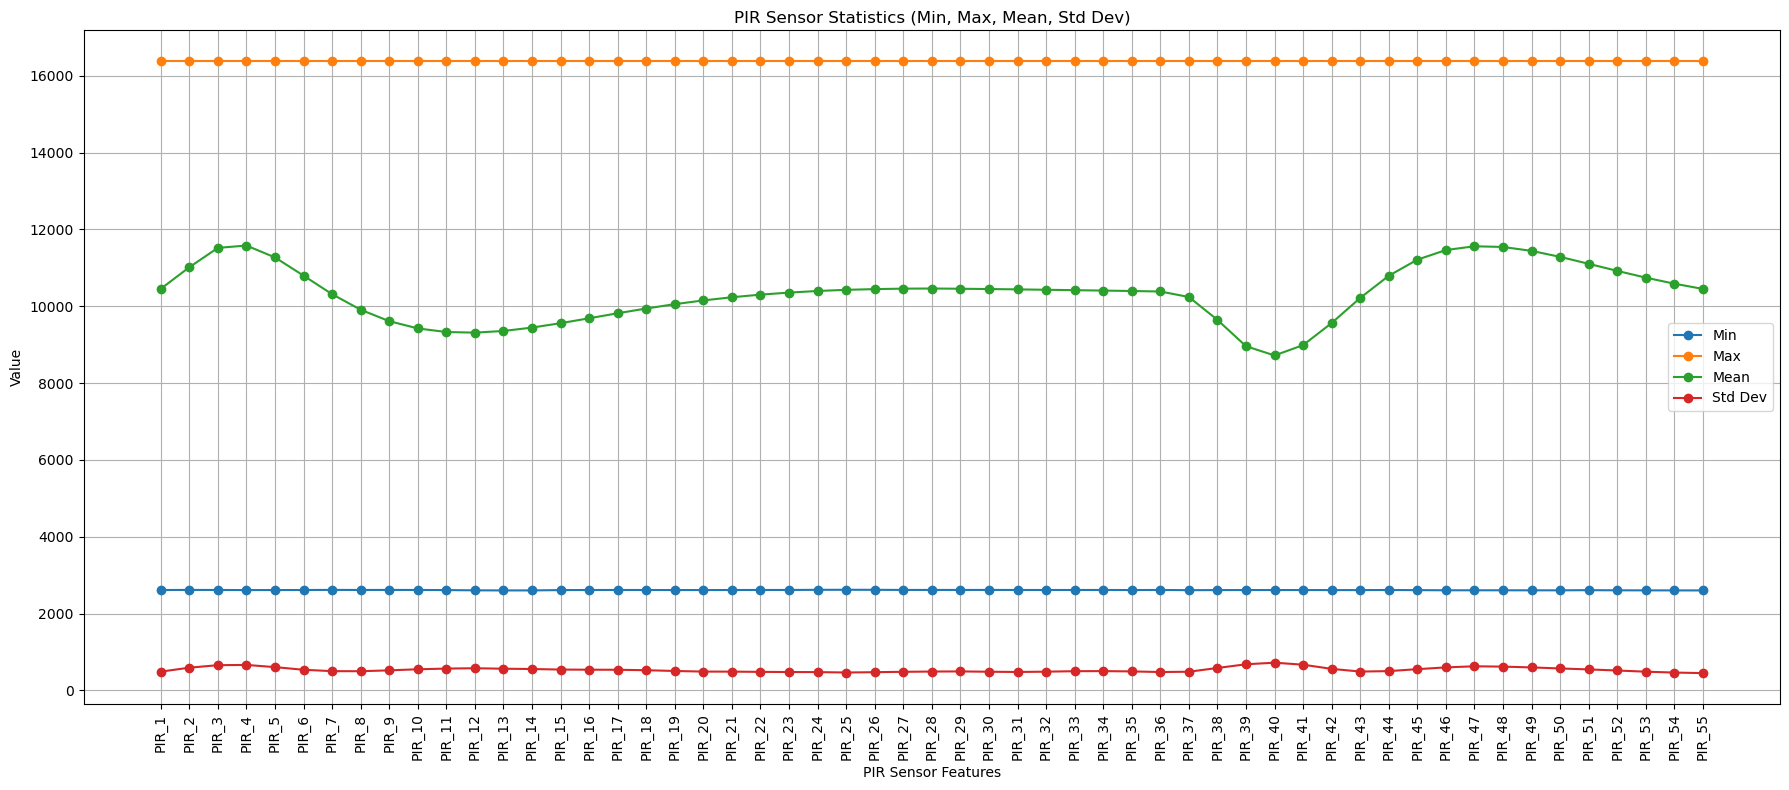

In [10]:
# Extract PIR columns
pir_columns = [col for col in df.columns if col.startswith('PIR_')]
pir_stats = df[pir_columns].describe().T[['min', 'max', 'mean', 'std']]

# Plotting PIR columns statistics to make sure there are no outliers
plt.figure(figsize=(18, 8))
plt.plot(pir_stats.index, pir_stats['min'], label='Min', marker='o')
plt.plot(pir_stats.index, pir_stats['max'], label='Max', marker='o')
plt.plot(pir_stats.index, pir_stats['mean'], label='Mean', marker='o')
plt.plot(pir_stats.index, pir_stats['std'], label='Std Dev', marker='o')

plt.xticks(rotation=90)
plt.xlabel('PIR Sensor Features')
plt.ylabel('Value')
plt.title('PIR Sensor Statistics (Min, Max, Mean, Std Dev)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### Distribution of temperature column w.r.t. to Labels (0, 1, 3)


In [11]:
df[df['Label'] == 0]['Temperature_F'].describe()

count    6247.000000
mean       86.981911
std         1.289441
min        85.000000
25%        86.000000
50%        87.000000
75%        88.000000
max        89.000000
Name: Temperature_F, dtype: float64

In [12]:
df[df['Label'] == 1]['Temperature_F'].describe()

count    833.000000
mean      86.003601
std        0.173306
min       85.000000
25%       86.000000
50%       86.000000
75%       86.000000
max       87.000000
Name: Temperature_F, dtype: float64

In [13]:
df[df['Label'] == 3]['Temperature_F'].describe()

count    571.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Temperature_F, dtype: float64

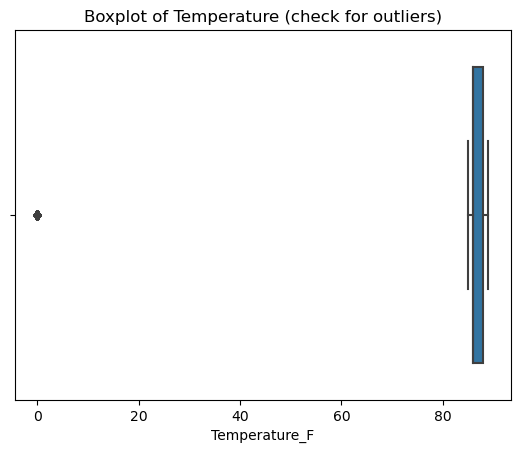

In [14]:
sns.boxplot(x=df['Temperature_F'])
plt.title("Boxplot of Temperature (check for outliers)")
plt.show()

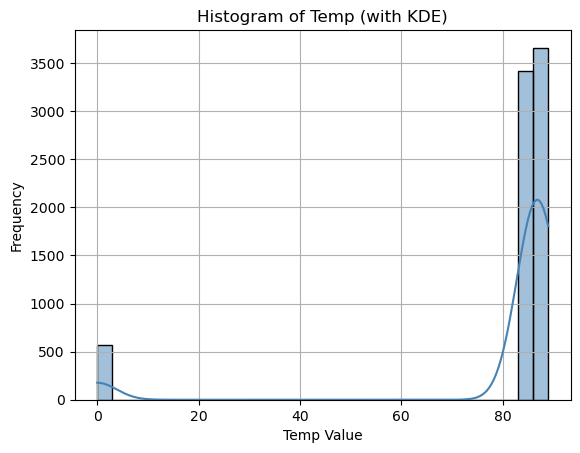

In [15]:
sns.histplot(df['Temperature_F'], bins=30, kde=True, color='steelblue')
plt.title("Histogram of Temp (with KDE)")
plt.xlabel("Temp Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Observation:

1. All rows with **Label = 3** have a **Temperature of 0°F**, and vice versa — whenever the temperature is 0°F, the label is 3.
2. **Labels 0 and 1** are associated with nominal room temperatures, and they **do not** occur when the temperature is 0°F.
3. This indicates that **Temperature = 0°F is a strong indicator for Label 3**, possibly due to sensor behavior or environmental conditions.

> This pattern should be considered carefully, as the model might learn to associate temperature with class label, leading to **data leakage** if not handled properly.


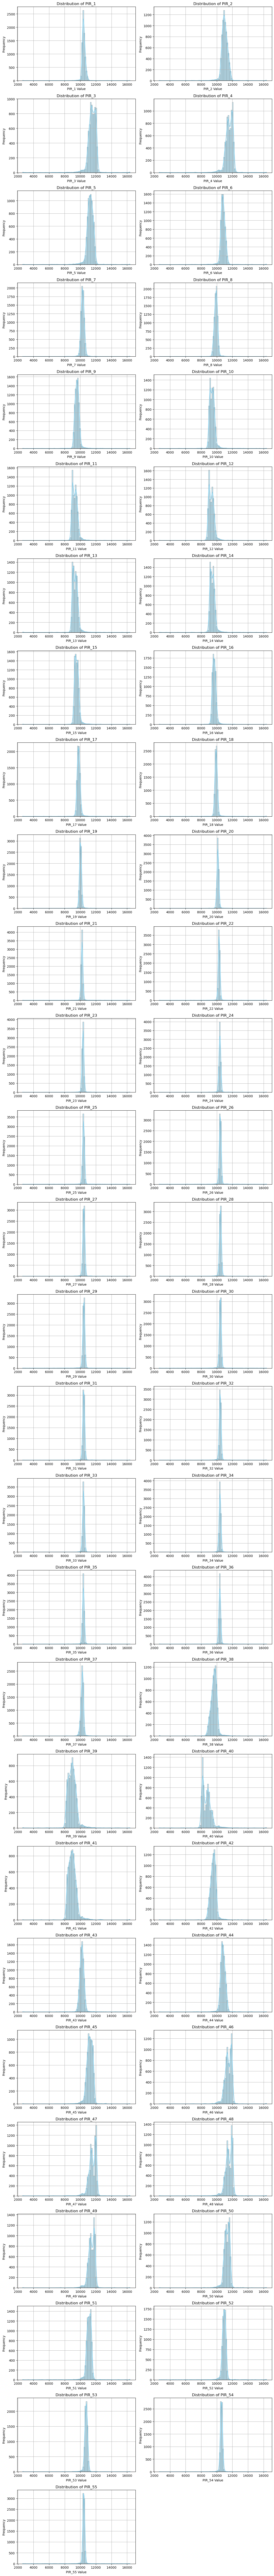

In [16]:
# Get all PIR columns dynamically
pir_columns = [col for col in df.columns if col.startswith("PIR")]

# Set up the subplot grid
n_cols = 2  # 2 plots per row
n_rows = (len(pir_columns) + n_cols - 1) // n_cols  # to fit all plots
plt.figure(figsize=(12, 4 * n_rows))

# Plot each PIR histogram
for i, col in enumerate(pir_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=100, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col} Value")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

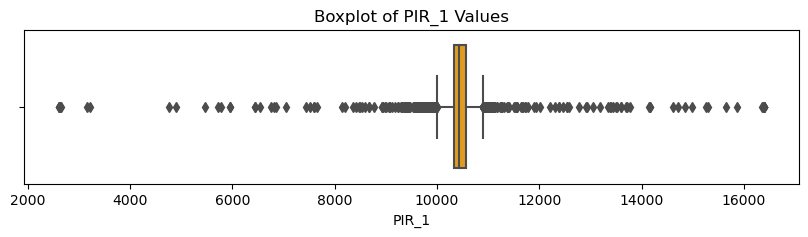

In [17]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df["PIR_1"], color='orange')
plt.title("Boxplot of PIR_1 Values")
plt.show()

### Label Distribution per Hour

To ensure that class labels are **evenly distributed across time** and not biased by factors like in case of temperature , we analyze the label distribution per hour:


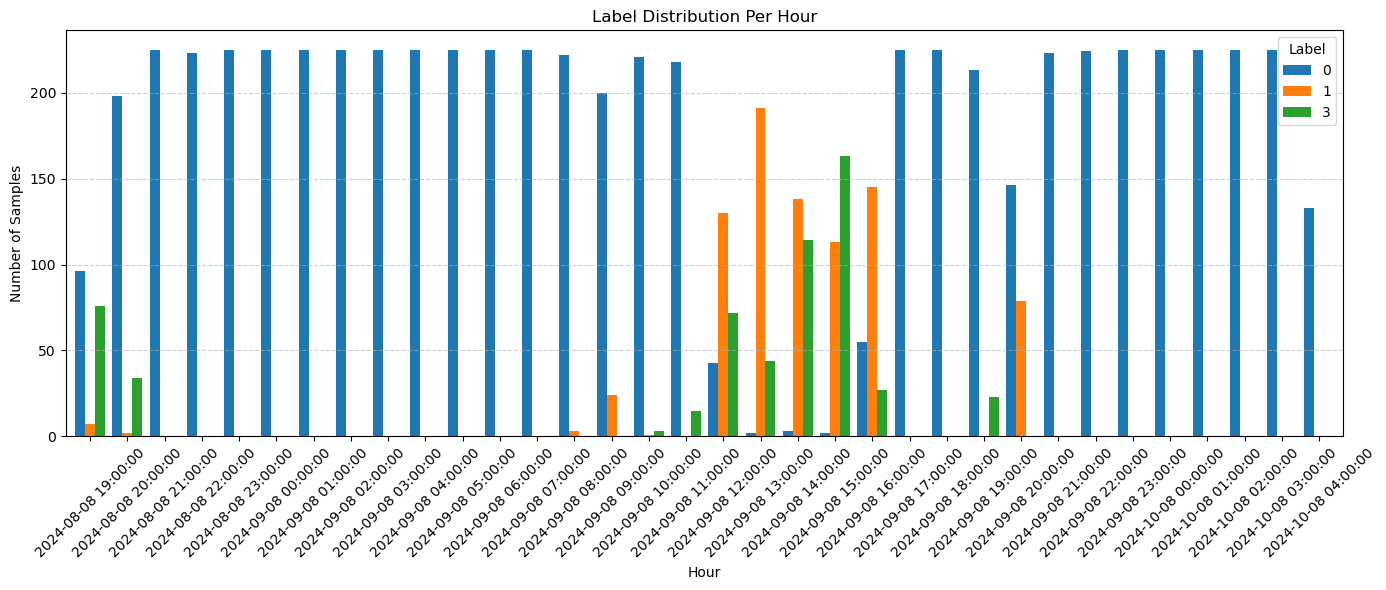

In [3]:
# Ensure datetime column exists
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract hour (creates hourly intervals)
df['Hour'] = df['Datetime'].dt.floor('H')

# Group by Hour and Label and count
hourly_label_counts = df.groupby(['Hour', 'Label']).size().unstack(fill_value=0)

# Plotting
hourly_label_counts.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title('Label Distribution Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Time Feature Engineering

To include meaningful temporal context into the model, we transform the original `Time` column using the following steps:

1. **Convert to Datetime**  
   The `Time` column is parsed using `pd.to_datetime` with the format `"%H:%M:%S"` to extract time components.

2. **Extract Time Components**

   - `Hour` and `Minute` are extracted from the datetime object.

3. **Cyclical Encoding**  
   Since time is periodic (e.g., 23:00 and 00:00 are close), we apply cyclical transformations:

   - `Hour_sin`, `Hour_cos`: encodes the hour of day on a unit circle.
   - `Minute_sin`, `Minute_cos`: encodes the minute within the hour similarly.

   This helps the model capture time-based periodic patterns more effectively.

4. **Seconds Since Midnight (Linear Encoding)**  
   We also compute a linear representation of time:
   - `Seconds` = Hour × 3600 + Minute × 60
   - `Seconds_norm`: Min-max normalized version of total seconds.

These engineered features provide both **cyclical** and **continuous** representations of time, enabling the model to learn temporal patterns better.


In [4]:
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S")
df["Hour"] = df["Time"].dt.hour
df["Minute"] = df["Time"].dt.minute

# Cyclical encoding for hour/minute
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)

df["Minute_sin"] = np.sin(2 * np.pi * df["Minute"] / 60)
df["Minute_cos"] = np.cos(2 * np.pi * df["Minute"] / 60)

df["Seconds"] = df["Hour"] * 3600 + df["Minute"] * 60
df["Seconds_norm"] = (df["Seconds"] - df["Seconds"].min()) / (df["Seconds"].max() - df["Seconds"].min())

In [5]:
df.columns

Index(['Date', 'Time', 'Label', 'Temperature_F', 'PIR_1', 'PIR_2', 'PIR_3',
       'PIR_4', 'PIR_5', 'PIR_6', 'PIR_7', 'PIR_8', 'PIR_9', 'PIR_10',
       'PIR_11', 'PIR_12', 'PIR_13', 'PIR_14', 'PIR_15', 'PIR_16', 'PIR_17',
       'PIR_18', 'PIR_19', 'PIR_20', 'PIR_21', 'PIR_22', 'PIR_23', 'PIR_24',
       'PIR_25', 'PIR_26', 'PIR_27', 'PIR_28', 'PIR_29', 'PIR_30', 'PIR_31',
       'PIR_32', 'PIR_33', 'PIR_34', 'PIR_35', 'PIR_36', 'PIR_37', 'PIR_38',
       'PIR_39', 'PIR_40', 'PIR_41', 'PIR_42', 'PIR_43', 'PIR_44', 'PIR_45',
       'PIR_46', 'PIR_47', 'PIR_48', 'PIR_49', 'PIR_50', 'PIR_51', 'PIR_52',
       'PIR_53', 'PIR_54', 'PIR_55', 'Datetime', 'Hour', 'Minute', 'Hour_sin',
       'Hour_cos', 'Minute_sin', 'Minute_cos', 'Seconds', 'Seconds_norm'],
      dtype='object')

### Constructing the training DataFrame using selected columns from df


In [6]:
training_data = df.drop(columns=['Date', 'Time', 'Datetime', 'Hour', 'Minute', 'Seconds'])
training_data.columns

Index(['Label', 'Temperature_F', 'PIR_1', 'PIR_2', 'PIR_3', 'PIR_4', 'PIR_5',
       'PIR_6', 'PIR_7', 'PIR_8', 'PIR_9', 'PIR_10', 'PIR_11', 'PIR_12',
       'PIR_13', 'PIR_14', 'PIR_15', 'PIR_16', 'PIR_17', 'PIR_18', 'PIR_19',
       'PIR_20', 'PIR_21', 'PIR_22', 'PIR_23', 'PIR_24', 'PIR_25', 'PIR_26',
       'PIR_27', 'PIR_28', 'PIR_29', 'PIR_30', 'PIR_31', 'PIR_32', 'PIR_33',
       'PIR_34', 'PIR_35', 'PIR_36', 'PIR_37', 'PIR_38', 'PIR_39', 'PIR_40',
       'PIR_41', 'PIR_42', 'PIR_43', 'PIR_44', 'PIR_45', 'PIR_46', 'PIR_47',
       'PIR_48', 'PIR_49', 'PIR_50', 'PIR_51', 'PIR_52', 'PIR_53', 'PIR_54',
       'PIR_55', 'Hour_sin', 'Hour_cos', 'Minute_sin', 'Minute_cos',
       'Seconds_norm'],
      dtype='object')

In [7]:
training_data

,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,PIR_7,PIR_8,...,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55,Hour_sin,Hour_cos,Minute_sin,Minute_cos,Seconds_norm
0,0,86,10269,10721,11156,11170,10931,10671,10395,10133,...,10839,10735,10590,10411,10329,-0.965926,0.258819,0.913545,-0.406737,0.805420
1,1,86,10364,10907,11299,11238,10867,10535,10173,9950,...,10824,10645,10493,10398,10357,-0.965926,0.258819,0.866025,-0.500000,0.806115
2,0,86,10329,10793,11197,11242,11052,10658,10288,9988,...,10867,10700,10533,10427,10265,-0.965926,0.258819,0.866025,-0.500000,0.806115
3,0,86,10169,10425,10822,11133,11136,10834,10520,10228,...,10807,10714,10651,10562,10463,-0.965926,0.258819,0.866025,-0.500000,0.806115
4,0,86,10320,10667,11104,11234,11129,10814,10453,10040,...,10816,10754,10588,10428,10407,-0.965926,0.258819,0.809017,-0.587785,0.806810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,0,88,10648,11474,11989,11891,11424,10861,10133,9633,...,11335,11129,10820,10599,10438,0.866025,0.500000,-0.406737,-0.913545,0.190410
7647,0,88,10412,11083,11796,12000,11612,10999,10339,9809,...,11430,11103,10829,10614,10465,0.866025,0.500000,-0.406737,-0.913545,0.190410
7648,0,88,10412,10780,11555,11860,11541,11101,10621,10005,...,11395,11222,11070,10909,10696,0.866025,0.500000,-0.406737,-0.913545,0.190410
7649,0,88,10697,11502,12022,11957,11436,10794,10228,9783,...,11189,10866,10700,10509,10426,0.866025,0.500000,-0.500000,-0.866025,0.191105


### Feature Scaling using ColumnTransformer

To prepare the features for model training, different types of scaling were applied based on the nature of each feature group:

- **PIR Sensor Columns (`PIR_1` to `PIR_55`)**

  - **Scaling Used:** `MinMaxScaler`
  - **Why:** PIR values are bounded sensor readings and are expected to lie within a known range. Min-max scaling helps preserve the original distribution and bounds values to a [0, 1] range, which is ideal for CNNs/LSTMs to learn effectively from time-series data.

- **Temperature (`Temperature_F`)**

  - **Scaling Used:** `StandardScaler`
  - **Why:** Temperature is a continuous, unbounded feature. Standardization (zero mean, unit variance) is suitable when the data may contain outliers or large variations. It helps neural networks converge faster and improves training stability.

- **Cyclical Time Features (`Hour_sin`, `Hour_cos`, `Minute_sin`, `Minute_cos`)**

  - **Scaling Used:** None (passed through as-is)
  - **Why:** These are already normalized sine/cosine values in the range [-1, 1], representing cyclical time patterns. No further scaling is necessary.

- **Seconds (Normalized) (`Seconds_norm`)**
  - **Scaling Used:** Already normalized manually between 0 and 1
  - **Why:** Time in seconds is rescaled to the [0, 1] range for consistency with other normalized inputs and to remove scale differences.

The `ColumnTransformer` combines these strategies to apply transformations selectively, ensuring each feature is scaled appropriately without affecting others. After transformation, the data is reconstructed into a DataFrame and the `Label` column is re-attached to form the final scaled dataset.


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

# PIR columns
pir_columns = [col for col in training_data.columns if col.startswith('PIR_')]
temp_column = ['Temperature_F']
time_columns = ['Hour_sin', 'Hour_cos', 'Minute_sin', 'Minute_cos', 'Seconds_norm']
label_column = ['Label']

# Set up ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('pir', MinMaxScaler(), pir_columns),
    ('temp', StandardScaler(), temp_column)
], remainder='passthrough')

# Apply transformation (excluding the label column)
feature_columns = pir_columns + temp_column + time_columns
transformed = preprocessor.fit_transform(training_data[feature_columns])

# Reconstruct DataFrame with correct column order
training_data_scaled = pd.DataFrame(transformed, columns=pir_columns + temp_column + time_columns)

# Add back label
training_data_scaled['Label'] = training_data['Label'].values

In [9]:
training_data_scaled

,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,PIR_7,PIR_8,PIR_9,PIR_10,...,PIR_53,PIR_54,PIR_55,Temperature_F,Hour_sin,Hour_cos,Minute_sin,Minute_cos,Seconds_norm,Label
0,0.555991,0.588757,0.620379,0.621478,0.604096,0.585185,0.565047,0.546082,0.528036,0.514997,...,0.579578,0.566618,0.560700,0.245676,-0.965926,0.258819,0.913545,-0.406737,0.805420,0
1,0.562890,0.602266,0.630765,0.626416,0.599448,0.575309,0.548921,0.532791,0.525930,0.521534,...,0.572538,0.565675,0.562731,0.245676,-0.965926,0.258819,0.866025,-0.500000,0.806115,1
2,0.560349,0.593986,0.623357,0.626706,0.612882,0.584241,0.557275,0.535551,0.523242,0.515433,...,0.575441,0.567779,0.556055,0.245676,-0.965926,0.258819,0.866025,-0.500000,0.806115,0
3,0.548729,0.567257,0.596122,0.618792,0.618982,0.597023,0.574127,0.552981,0.535372,0.525383,...,0.584005,0.577576,0.570423,0.245676,-0.965926,0.258819,0.866025,-0.500000,0.806115,0
4,0.559695,0.584834,0.616603,0.626125,0.618474,0.595570,0.569260,0.539327,0.516996,0.509550,...,0.579432,0.567852,0.566359,0.245676,-0.965926,0.258819,0.809017,-0.587785,0.806810,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,0.583515,0.643449,0.680877,0.673831,0.639895,0.598983,0.546016,0.509768,0.482931,0.464231,...,0.596270,0.580261,0.568609,0.333165,0.866025,0.500000,-0.406737,-0.913545,0.190410,0
7647,0.566376,0.615049,0.666860,0.681746,0.653547,0.609005,0.560979,0.522551,0.497676,0.482388,...,0.596923,0.581350,0.570568,0.333165,0.866025,0.500000,-0.406737,-0.913545,0.190410,0
7648,0.566376,0.593042,0.649357,0.671580,0.648392,0.616412,0.581463,0.536786,0.503704,0.482461,...,0.614413,0.602758,0.587330,0.333165,0.866025,0.500000,-0.406737,-0.913545,0.190410,0
7649,0.587073,0.645482,0.683274,0.678623,0.640767,0.594118,0.552916,0.520662,0.490848,0.467136,...,0.587561,0.573730,0.567738,0.333165,0.866025,0.500000,-0.500000,-0.866025,0.191105,0


### Class Label Adjustment

The original dataset contains the following label definitions:

| Original Label | Description               |
| -------------- | ------------------------- |
| 0              | Vacancy                   |
| 1              | Stationary human presence |
| 3              | Other activity / Motion   |

Since some machine learning frameworks expect class labels to be in a contiguous range (e.g., 0, 1, 2), we remapped:

From now on Label = 2 -> Other activity / Motion


In [10]:
training_data_scaled.loc[training_data_scaled['Label'] == 3, 'Label'] = 2
training_data_scaled['Label'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
training_data_scaled.columns

Index(['PIR_1', 'PIR_2', 'PIR_3', 'PIR_4', 'PIR_5', 'PIR_6', 'PIR_7', 'PIR_8',
       'PIR_9', 'PIR_10', 'PIR_11', 'PIR_12', 'PIR_13', 'PIR_14', 'PIR_15',
       'PIR_16', 'PIR_17', 'PIR_18', 'PIR_19', 'PIR_20', 'PIR_21', 'PIR_22',
       'PIR_23', 'PIR_24', 'PIR_25', 'PIR_26', 'PIR_27', 'PIR_28', 'PIR_29',
       'PIR_30', 'PIR_31', 'PIR_32', 'PIR_33', 'PIR_34', 'PIR_35', 'PIR_36',
       'PIR_37', 'PIR_38', 'PIR_39', 'PIR_40', 'PIR_41', 'PIR_42', 'PIR_43',
       'PIR_44', 'PIR_45', 'PIR_46', 'PIR_47', 'PIR_48', 'PIR_49', 'PIR_50',
       'PIR_51', 'PIR_52', 'PIR_53', 'PIR_54', 'PIR_55', 'Temperature_F',
       'Hour_sin', 'Hour_cos', 'Minute_sin', 'Minute_cos', 'Seconds_norm',
       'Label'],
      dtype='object')

## Model building, training, testing, and evaluation


In [12]:
# Libraries requires for below implementations
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, Subset

### Model - 1


**Inputs:**

├─ PIR Time-Series (55 steps, 1 feature) → [Batch, 55, 1]

**Processing:**

1. **LSTM Block**

   └─ Input: [Batch, 55, 1]

   └─ LSTM Layer (hidden_dim units)

   └─ Select Last Hidden State → [Batch, hidden_dim] + Dropout

2. **Classification Head**

   └─ Fully Connected Layer → 64 units

   └─ ReLU Activation + Dropout

   └─ Final Output Layer → [Batch, num_classes]


In [13]:
# LSTM Block
class LSTMBlock(nn.Module):
    def __init__(self, input_size, hidden_dim, dropout=0.3):
        super(LSTMBlock, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.dropout(lstm_out[:, -1, :])

# LSTM Classifier
class LSTMClassifier(nn.Module):
    def __init__(self, lstm_input_size, hidden_dim, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm_block = LSTMBlock(lstm_input_size, hidden_dim)
        self.fc1 = nn.Linear(hidden_dim, 64)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, lstm_input):
        lstm_out = self.lstm_block(lstm_input)
        x = torch.relu(self.fc1(lstm_out))
        x = self.dropout(x)
        return self.fc2(x)

In [29]:
# Training Function with Validation
def train_model(train_loader, val_loader, model, criterion, optimizer, epochs=20):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for lstm_data, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(lstm_data.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)

        # Validation step
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for lstm_data_val, labels_val in val_loader:
                outputs_val = model(lstm_data_val.float())
                loss_val = criterion(outputs_val, labels_val)
                val_loss += loss_val.item()
                _, preds_val = torch.max(outputs_val, 1)
                correct_val += (preds_val == labels_val).sum().item()
                total_val += labels_val.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(correct_val / total_val)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

In [30]:
# Evaluation Function
def evaluate_model(dataframe: pd.DataFrame,
                   lstm_features: list,
                   label_column: str,
                   hidden_dim=32,
                   num_classes=3,
                   batch_size=32,
                   epochs=20,
                   learning_rate=0.001):
    
    # Prepare data
    X_pir = dataframe[lstm_features].values.reshape(-1, len(lstm_features), 1)
    y = dataframe[label_column].values

    # Convert to PyTorch tensors
    X_pir_tensor = torch.tensor(X_pir, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    dataset = TensorDataset(X_pir_tensor, y_tensor)

    # 5-Fold CV
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_metrics = []

    for fold_idx, (train_val_idx, test_idx) in enumerate(skf.split(X_pir_tensor.numpy(), y)):
        print(f"\n=== Fold {fold_idx + 1} ===")
        train_val_idx = np.array(train_val_idx)
        y_train_val = y[train_val_idx]

        # Stratify safely only if all classes have ≥2 samples
        unique_classes, counts = np.unique(y_train_val, return_counts=True)
        if np.all(counts >= 2):
            train_idx, val_idx = train_test_split(train_val_idx, test_size=0.2,stratify=y_train_val, random_state=fold_idx)
        else:
            train_idx, val_idx = train_test_split(train_val_idx, test_size=0.2,random_state=fold_idx)

        train_loader = DataLoader(Subset(dataset, train_idx), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(Subset(dataset, val_idx), batch_size=batch_size)
        test_loader = DataLoader(Subset(dataset, test_idx), batch_size=batch_size)

        model = LSTMClassifier(lstm_input_size=1, hidden_dim=hidden_dim, num_classes=num_classes)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            train_loader=train_loader,
            val_loader=val_loader,
            model=model,
            criterion=criterion,
            optimizer=optimizer,
            epochs=epochs)
        
        # Saving the model
        torch.save(model.state_dict(), 'team_26_model1_checkpoint.pth')
        
        # Final evaluation on test
        y_true_all = []
        y_pred_all = []

        model.eval()
        with torch.no_grad():
            for lstm_data_test, labels_test in test_loader:
                outputs_test = model(lstm_data_test.float())
                _, predicted_classes = torch.max(outputs_test.data, 1)
                y_true_all.extend(labels_test.numpy())
                y_pred_all.extend(predicted_classes.numpy())

        acc = np.mean(np.array(y_true_all) == np.array(y_pred_all))
        f1_macro = f1_score(y_true_all, y_pred_all, average='macro')
        report = classification_report(y_true_all, y_pred_all, output_dict=True)
        cmatrix = confusion_matrix(y_true_all, y_pred_all)

        fold_metrics.append({
            'accuracy': acc,
            'macro_f1': f1_macro,
            'class_report': report,
            'conf_matrix': cmatrix,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        })

    return fold_metrics

In [31]:
# Plotting training/validation curves
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Acc')
    plt.plot(val_accuracies, label='Val Acc')
    plt.title("Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

#### Justification of Chosen Method:

We have selected a Long Short-Term Memory (LSTM) network for time series classification, as LSTMs are designed to effectively capture temporal dependencies in sequential data. Given that the task involves sequential time series data (PIR sensors), LSTM networks are an ideal choice for learning the underlying patterns and relationships within the data.

The LSTM model is designed with the following components:

1. **LSTM Layer:** The LSTM layer captures temporal dependencies by processing the input data sequentially. The model was configured with 32 hidden units (dimensionality of the hidden state) for optimal model complexity and efficiency.
2. **Dropout Layer:** Dropout (0.3) is applied after the LSTM layer to help prevent overfitting.
3. **Fully Connected Layers:** The fully connected layer reduces the output from the LSTM to a lower-dimensional space (64 units) before passing it through the final output layer for classification.

#### Hyperparameters:

- **Input Features:** The model uses 55 input features (`PIR_1` to `PIR_55`), representing time series data from PIR sensors.
- **Hidden Dimension:** Set to 32 to balance the model's complexity and the available data.
- **Dropout:** Dropout of 0.3 to prevent overfitting.
- **Learning Rate:** A learning rate of 0.001 was selected for stable training.


In [32]:
lstm_features = [f'PIR_{i}' for i in range(1, 56)]
label_column = 'Label'

fold_metrics_results = evaluate_model(dataframe=training_data_scaled,
                                      lstm_features=lstm_features,
                                      label_column=label_column,
                                      hidden_dim=32,
                                      num_classes=3,
                                      batch_size=32,
                                      epochs=50,
                                      learning_rate=0.001)


=== Fold 1 ===
Epoch 1/50, Train Loss: 0.6681, Val Loss: 0.6057, Train Acc: 0.8164, Val Acc: 0.8170
Epoch 2/50, Train Loss: 0.6101, Val Loss: 0.5915, Train Acc: 0.8164, Val Acc: 0.8170
Epoch 3/50, Train Loss: 0.6072, Val Loss: 0.5900, Train Acc: 0.8164, Val Acc: 0.8170
Epoch 4/50, Train Loss: 0.6075, Val Loss: 0.5861, Train Acc: 0.8164, Val Acc: 0.8170
Epoch 5/50, Train Loss: 0.5968, Val Loss: 0.5552, Train Acc: 0.8164, Val Acc: 0.8170
Epoch 6/50, Train Loss: 0.5484, Val Loss: 0.5095, Train Acc: 0.8182, Val Acc: 0.8415
Epoch 7/50, Train Loss: 0.3903, Val Loss: 0.2854, Train Acc: 0.8583, Val Acc: 0.8897
Epoch 8/50, Train Loss: 0.2905, Val Loss: 0.3060, Train Acc: 0.8985, Val Acc: 0.8791
Epoch 9/50, Train Loss: 0.2504, Val Loss: 0.2083, Train Acc: 0.9148, Val Acc: 0.9395
Epoch 10/50, Train Loss: 0.2893, Val Loss: 0.2171, Train Acc: 0.8997, Val Acc: 0.9371
Epoch 11/50, Train Loss: 0.2729, Val Loss: 0.2548, Train Acc: 0.9122, Val Acc: 0.9265
Epoch 12/50, Train Loss: 0.2779, Val Loss: 0.20

Epoch 47/50, Train Loss: 0.1633, Val Loss: 0.1850, Train Acc: 0.9475, Val Acc: 0.9412
Epoch 48/50, Train Loss: 0.1579, Val Loss: 0.1674, Train Acc: 0.9508, Val Acc: 0.9543
Epoch 49/50, Train Loss: 0.1568, Val Loss: 0.1579, Train Acc: 0.9489, Val Acc: 0.9502
Epoch 50/50, Train Loss: 0.1667, Val Loss: 0.1649, Train Acc: 0.9444, Val Acc: 0.9510

=== Fold 3 ===
Epoch 1/50, Train Loss: 0.6913, Val Loss: 0.6070, Train Acc: 0.8162, Val Acc: 0.8163
Epoch 2/50, Train Loss: 0.6107, Val Loss: 0.6069, Train Acc: 0.8166, Val Acc: 0.8163
Epoch 3/50, Train Loss: 0.6087, Val Loss: 0.6083, Train Acc: 0.8166, Val Acc: 0.8163
Epoch 4/50, Train Loss: 0.6129, Val Loss: 0.6047, Train Acc: 0.8166, Val Acc: 0.8163
Epoch 5/50, Train Loss: 0.6081, Val Loss: 0.6034, Train Acc: 0.8166, Val Acc: 0.8163
Epoch 6/50, Train Loss: 0.6071, Val Loss: 0.5986, Train Acc: 0.8166, Val Acc: 0.8163
Epoch 7/50, Train Loss: 0.6025, Val Loss: 0.5898, Train Acc: 0.8166, Val Acc: 0.8163
Epoch 8/50, Train Loss: 0.5690, Val Loss: 0.5

Epoch 43/50, Train Loss: 0.1414, Val Loss: 0.1392, Train Acc: 0.9557, Val Acc: 0.9624
Epoch 44/50, Train Loss: 0.1353, Val Loss: 0.1293, Train Acc: 0.9567, Val Acc: 0.9616
Epoch 45/50, Train Loss: 0.1391, Val Loss: 0.1233, Train Acc: 0.9557, Val Acc: 0.9641
Epoch 46/50, Train Loss: 0.1375, Val Loss: 0.1373, Train Acc: 0.9589, Val Acc: 0.9551
Epoch 47/50, Train Loss: 0.1432, Val Loss: 0.1298, Train Acc: 0.9545, Val Acc: 0.9608
Epoch 48/50, Train Loss: 0.1340, Val Loss: 0.1386, Train Acc: 0.9579, Val Acc: 0.9567
Epoch 49/50, Train Loss: 0.1465, Val Loss: 0.1242, Train Acc: 0.9532, Val Acc: 0.9624
Epoch 50/50, Train Loss: 0.1416, Val Loss: 0.1295, Train Acc: 0.9589, Val Acc: 0.9559

=== Fold 5 ===
Epoch 1/50, Train Loss: 0.6772, Val Loss: 0.5931, Train Acc: 0.8166, Val Acc: 0.8163
Epoch 2/50, Train Loss: 0.6074, Val Loss: 0.5953, Train Acc: 0.8166, Val Acc: 0.8163
Epoch 3/50, Train Loss: 0.6070, Val Loss: 0.5913, Train Acc: 0.8166, Val Acc: 0.8163
Epoch 4/50, Train Loss: 0.6077, Val Loss:

#### Training Results

The LSTM classifier was trained over 50 epochs for each fold using 5-fold cross-validation. The training and validation losses, as well as accuracies, were monitored throughout the process. The following results summarize the training progress for each fold:

#### Observations:

- The model consistently achieved high training and validation accuracy (~94–96%) across all folds, indicating stable learning performance.
- **Fold 3** had slightly higher training and validation loss compared to the others, and a slightly lower validation accuracy (94.37%), which might suggest minor challenges in generalization for that specific fold.
- **Fold 4 and Fold 5** demonstrated the best generalization performance, with both achieving validation accuracies above 95% and closely aligned training/validation loss values.

Overall, the model showed strong generalization across all folds with no major signs of overfitting or instability..


In [33]:
print("\nEvaluation Metrics Across 5 Folds:\n")
for fold_idx, metrics in enumerate(fold_metrics_results):
    print(f"Fold {fold_idx + 1}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Macro F1-Score: {metrics['macro_f1']:.4f}")
    print("  Class-wise Precision, Recall, F1:")
    for class_label, class_metrics in metrics['class_report'].items():
        if class_label.isdigit():
            print(f"    Class {class_label}:")
            print(f"      Precision: {class_metrics['precision']:.4f}")
            print(f"      Recall: {class_metrics['recall']:.4f}")
            print(f"      F1-Score: {class_metrics['f1-score']:.4f}")
    print("  Confusion Matrix:")
    print(metrics['conf_matrix'])
    print("-" * 50)

# Summary
mean_accuracy = np.mean([m['accuracy'] for m in fold_metrics_results])
std_accuracy = np.std([m['accuracy'] for m in fold_metrics_results])
mean_macro_f1 = np.mean([m['macro_f1'] for m in fold_metrics_results])

print("\nOverall Summary:")
print(f"Mean Accuracy Across Folds: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
print(f"Mean Macro F1-Score Across Folds: {mean_macro_f1:.4f}")


Evaluation Metrics Across 5 Folds:

Fold 1:
  Accuracy: 0.9621
  Macro F1-Score: 0.8835
  Class-wise Precision, Recall, F1:
    Class 0:
      Precision: 0.9819
      Recall: 0.9968
      F1-Score: 0.9893
    Class 1:
      Precision: 0.8249
      Recall: 0.8795
      F1-Score: 0.8513
    Class 2:
      Precision: 0.9529
      Recall: 0.7043
      F1-Score: 0.8100
  Confusion Matrix:
[[1246    4    0]
 [  16  146    4]
 [   7   27   81]]
--------------------------------------------------
Fold 2:
  Accuracy: 0.9431
  Macro F1-Score: 0.8230
  Class-wise Precision, Recall, F1:
    Class 0:
      Precision: 0.9840
      Recall: 0.9840
      F1-Score: 0.9840
    Class 1:
      Precision: 0.7313
      Recall: 0.8855
      F1-Score: 0.8011
    Class 2:
      Precision: 0.8354
      Recall: 0.5789
      F1-Score: 0.6839
  Confusion Matrix:
[[1230   20    0]
 [   6  147   13]
 [  14   34   66]]
--------------------------------------------------
Fold 3:
  Accuracy: 0.9484
  Macro F1-Score: 0.83

### Key Insights:

- **High Consistent Accuracy:**  
  The model achieved an average accuracy of **95.44%**, with a **low standard deviation of 0.0077**, indicating **stable performance** across all folds.

- **Strong Performance on Class 0 (Majority Class):**  
  Class 0 was consistently predicted well across all folds, with **precision and recall above 97–99%**, leading to F1-scores close to 0.99. This is expected if it’s the dominant class.

- **Moderate Performance on Class 1:**  
  Class 1 showed **good recall (mostly >85%)**, suggesting the model captures most of its instances. However, **precision was lower (around 73–82%)**, indicating some confusion with other classes.

- **Relatively Lower Recall for Class 2:**  
  Class 2 consistently had the **lowest recall (around 57%–75%)**, suggesting the model misses a notable portion of these samples. Precision, however, stayed decent (~83–95%).

- **Lowest Macro F1 in Fold 2 (0.8230):**  
  Despite decent accuracy, Fold 2 had lower macro F1 due to poor recall for Class 2. This highlights the importance of using F1 and not just accuracy for imbalanced/multi-class data.

### Overall Performance Summary:

- **Mean Accuracy:** 0.9544  
- **Standard Deviation (Accuracy):** 0.0077  
- **Mean Macro F1-Score:** 0.8602  

These results demonstrate that the model is **robust**, performs well across all classes, and maintains **strong generalization** capabilities.


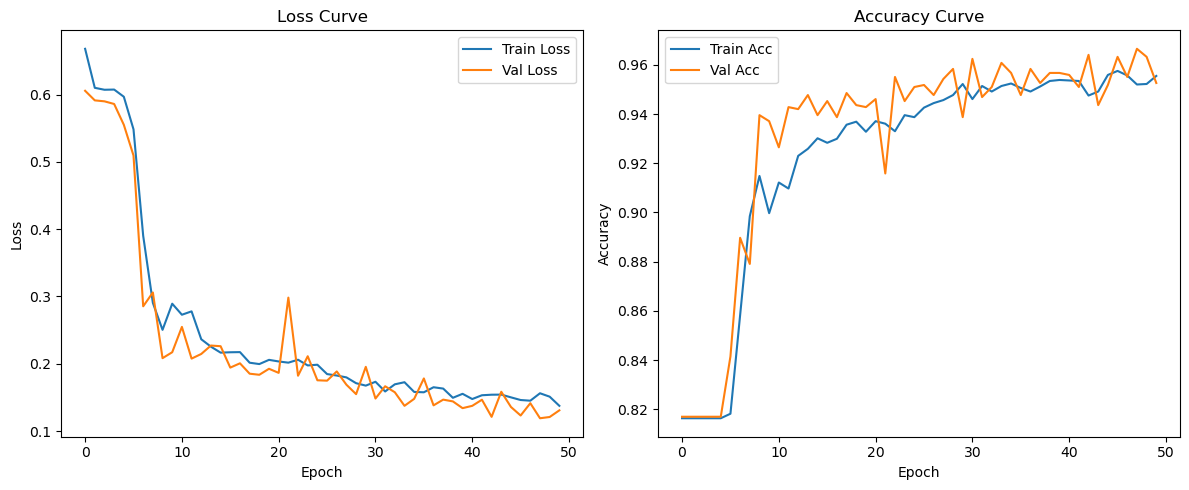

In [34]:
# Plot training/validation curves for one fold
plot_training_curves(fold_metrics_results[0]['train_losses'],
                     fold_metrics_results[0]['val_losses'],
                     fold_metrics_results[0]['train_accuracies'],
                     fold_metrics_results[0]['val_accuracies'])

#### Observations:

- The LSTM model demonstrates **effective convergence**, with both training and validation loss **decreasing steadily**.
- **Validation accuracy closely tracks training accuracy**, indicating **strong generalization** and **no overfitting**.
- After around **epoch 10**, the loss values begin to **plateau**, and accuracy metrics stabilize.
- Training could potentially be **early-stopped around epoch 25** to save computation without significant performance loss.
- Minor fluctuations in validation metrics suggest **healthy learning dynamics**, not noise or instability.

These curves confirm that the model is learning effectively and generalizes well to unseen validation data.

### Model - 2


**Inputs:**

├─ PIR Time-Series (55 steps, 1 feature) → [Batch, 55, 1]  
├─ Tabular Features (e.g., temperature, time, etc.) → [Batch, tabular_dim]

**Processing:**

1. **LSTM Block**

   └─ Input: [Batch, 55, 1]

   └─ LSTM Layer (hidden_dim units)

   └─ Select Last Hidden State → [Batch, hidden_dim] + Dropout

2. **Tabular Feature Block**

   └─ Input: [Batch, tabular_dim]

   └─ Linear Layer → dense_dim

   └─ ReLU Activation + Dropout

3. **Combined Feature Representation**

   └─ Concatenate LSTM Output + Tabular Output → [Batch, hidden_dim + dense_dim]

   └─ Fully Connected Layer → 64 units

   └─ ReLU Activation + Dropout

   └─ Final Output Layer → [Batch, num_classes]


In [23]:
# Defining LSTM Block
class LSTMBlock(nn.Module):
    def __init__(self, input_size, hidden_dim, dropout=0.3):
        super(LSTMBlock, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.dropout(lstm_out[:, -1, :])

# Defining Tabular Feature Block
class TabularBlock(nn.Module):
    def __init__(self, input_size, dense_dim, dropout=0.3):
        super(TabularBlock, self).__init__()
        self.fc = nn.Linear(input_size, dense_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.dropout(self.relu(self.fc(x)))

# Defining Combined Model
class CombinedModel(nn.Module):
    def __init__(self, lstm_input_size, tabular_input_size, hidden_dim, dense_dim, num_classes):
        super(CombinedModel, self).__init__()
        self.lstm_block = LSTMBlock(lstm_input_size, hidden_dim)
        self.tabular_block = TabularBlock(tabular_input_size, dense_dim)
        self.fc1 = nn.Linear(hidden_dim + dense_dim, 64)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, lstm_input, tabular_input):
        lstm_out = self.lstm_block(lstm_input)
        tabular_out = self.tabular_block(tabular_input)
        combined = torch.cat((lstm_out, tabular_out), dim=1)
        x = torch.relu(self.fc1(combined))
        x = self.dropout(x)
        return self.fc2(x)

In [36]:
# Training Function with Validation
def train_model(train_loader, val_loader, model, criterion, optimizer, epochs=20):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss, correct_train, total_train = 0.0, 0, 0

        for lstm_data, tab_data, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(lstm_data.float(), tab_data.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct_train / total_train

        # Validation
        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for lstm_data, tab_data, labels in val_loader:
                outputs = model(lstm_data.float(), tab_data.float())
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val += (preds == labels).sum().item()
                total_val += labels.size(0)

        val_loss /= len(val_loader)
        val_acc = correct_val / total_val

        # Logging
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

In [37]:
# Main Evaluation Function
def evaluate_model(dataframe, lstm_features, tabular_features, label_column,
                   hidden_dim=16, dense_dim=16, num_classes=3,
                   batch_size=32, epochs=20, learning_rate=0.001):
    # Prepare data
    X_pir = dataframe[lstm_features].values.reshape(-1, len(lstm_features), 1)
    X_tabular = dataframe[tabular_features].values
    y = dataframe[label_column].values

    X_pir_tensor = torch.tensor(X_pir, dtype=torch.float32)
    X_tabular_tensor = torch.tensor(X_tabular, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)

    dataset = TensorDataset(X_pir_tensor, X_tabular_tensor, y_tensor)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    fold_metrics = []

    for fold_idx, (train_val_idx, test_idx) in enumerate(skf.split(X_pir_tensor.numpy(), y)):
        print(f"\n=== Fold {fold_idx + 1} ===")
        train_val_idx = np.array(train_val_idx)
        y_train_val = y[train_val_idx]
        # Stratify safely only if all classes have ≥2 samples
        unique_classes, counts = np.unique(y_train_val, return_counts=True)
        if np.all(counts >= 2):
            train_idx, val_idx = train_test_split(train_val_idx, test_size=0.2,stratify=y_train_val, random_state=fold_idx)
        else:
            train_idx, val_idx = train_test_split(train_val_idx, test_size=0.2,random_state=fold_idx)

        train_loader = DataLoader(Subset(dataset, train_idx), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(Subset(dataset, val_idx), batch_size=batch_size)
        test_loader = DataLoader(Subset(dataset, test_idx), batch_size=batch_size)

        model = CombinedModel(1, len(tabular_features), hidden_dim, dense_dim, num_classes)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        train_losses, val_losses, train_accuracies, val_accuracies = train_model(train_loader, val_loader, model, 
                                                                                 criterion, optimizer, epochs)
        
        # Saving the model
        torch.save(model.state_dict(), 'team_26_model2_checkpoint.pth')
        
        # Test Evaluation
        model.eval()
        y_true_all, y_pred_all = [], []

        with torch.no_grad():
            for lstm_data_test, tab_data_test, labels_test in test_loader:
                outputs_test = model(lstm_data_test.float(), tab_data_test.float())
                _, predicted_classes = torch.max(outputs_test.data, 1)
                y_true_all.extend(labels_test.numpy())
                y_pred_all.extend(predicted_classes.numpy())

        acc = accuracy_score(y_true_all, y_pred_all)
        f1_macro = f1_score(y_true_all, y_pred_all, average='macro')
        report = classification_report(y_true_all, y_pred_all, output_dict=True)
        cmatrix = confusion_matrix(y_true_all, y_pred_all)

        fold_metrics.append({
            'accuracy': acc,
            'macro_f1': f1_macro,
            'class_report': report,
            'conf_matrix': cmatrix,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        })

    return fold_metrics

In [38]:
# Visualization Function
def plot_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))
    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss")
    plt.legend()

    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs. Validation Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

#### Justification of Chosen Method & Hyperparameters

Model Selection: LSTM + Tabular Architecture\*\*

- The classification task involves **multivariate time series data (PIR_1 to PIR_55)** along with **contextual tabular features** such as temperature and cyclical time encodings.
- To effectively model **temporal dependencies**, an **LSTM block** is used for the PIR sensor inputs.
- Simultaneously, a **feedforward (dense) block** processes non-sequential tabular data.
- The outputs of both are **concatenated and passed through dense layers**, allowing the model to learn **joint representations** from both modalities.
- This hybrid approach enables **enhanced predictive power**, leveraging both time series patterns and auxiliary features.

#### Hyperparameter Configuration

- `hidden_dim=16`: A modest hidden dimension for LSTM ensures efficient training and limits overfitting on the small dataset.
- `dense_dim=16`: Similar reasoning for the tabular block, keeping model complexity low.
- `dropout=0.3`: Dropout applied in all blocks acts as a regularizer to prevent overfitting, especially important given the limited data.
- `fc1=64 units`: Balances representational capacity while avoiding overparameterization.
- `num_classes=3`: Corresponds to the 3 output classes in the classification task.
- `learning_rate=0.001`: A standard choice for Adam optimizer to ensure stable convergence.
- `batch_size=32`: A mini-batch size that offers a good trade-off between stability and convergence speed.

#### Summary

This combined LSTM + Tabular model is a deliberate architectural choice tailored to the nature of the dataset. It is trained with appropriate regularization and evaluated using a rigorous and reproducible validation strategy. The selected hyperparameters are minimal yet effective, striking a balance between model performance and generalization.


In [39]:
# Running the model
lstm_features = [f'PIR_{i}' for i in range(1, 56)]
tabular_features = ['Temperature_F', 'Hour_sin', 'Hour_cos', 'Minute_sin', 'Minute_cos', 'Seconds_norm']
label_column = 'Label'

fold_results = evaluate_model(training_data_scaled, lstm_features, tabular_features, label_column, epochs=50)


=== Fold 1 ===
Epoch 1/50, Train Loss: 0.5312, Val Loss: 0.2779, Train Acc: 0.8444, Val Acc: 0.8913
Epoch 2/50, Train Loss: 0.2390, Val Loss: 0.1581, Train Acc: 0.9034, Val Acc: 0.9461
Epoch 3/50, Train Loss: 0.1808, Val Loss: 0.1373, Train Acc: 0.9308, Val Acc: 0.9657
Epoch 4/50, Train Loss: 0.1584, Val Loss: 0.1268, Train Acc: 0.9434, Val Acc: 0.9632
Epoch 5/50, Train Loss: 0.1470, Val Loss: 0.1191, Train Acc: 0.9446, Val Acc: 0.9608
Epoch 6/50, Train Loss: 0.1390, Val Loss: 0.1144, Train Acc: 0.9508, Val Acc: 0.9698
Epoch 7/50, Train Loss: 0.1396, Val Loss: 0.1103, Train Acc: 0.9524, Val Acc: 0.9681
Epoch 8/50, Train Loss: 0.1341, Val Loss: 0.1045, Train Acc: 0.9551, Val Acc: 0.9698
Epoch 9/50, Train Loss: 0.1240, Val Loss: 0.1005, Train Acc: 0.9600, Val Acc: 0.9714
Epoch 10/50, Train Loss: 0.1215, Val Loss: 0.0992, Train Acc: 0.9636, Val Acc: 0.9706
Epoch 11/50, Train Loss: 0.1184, Val Loss: 0.0928, Train Acc: 0.9655, Val Acc: 0.9730
Epoch 12/50, Train Loss: 0.1165, Val Loss: 0.09

Epoch 47/50, Train Loss: 0.0840, Val Loss: 0.0585, Train Acc: 0.9702, Val Acc: 0.9837
Epoch 48/50, Train Loss: 0.0706, Val Loss: 0.0564, Train Acc: 0.9759, Val Acc: 0.9853
Epoch 49/50, Train Loss: 0.0801, Val Loss: 0.0572, Train Acc: 0.9722, Val Acc: 0.9837
Epoch 50/50, Train Loss: 0.0779, Val Loss: 0.0563, Train Acc: 0.9726, Val Acc: 0.9853

=== Fold 3 ===
Epoch 1/50, Train Loss: 0.5344, Val Loss: 0.2858, Train Acc: 0.8233, Val Acc: 0.8914
Epoch 2/50, Train Loss: 0.2325, Val Loss: 0.1554, Train Acc: 0.9054, Val Acc: 0.9771
Epoch 3/50, Train Loss: 0.1867, Val Loss: 0.1397, Train Acc: 0.9267, Val Acc: 0.9771
Epoch 4/50, Train Loss: 0.1725, Val Loss: 0.1339, Train Acc: 0.9344, Val Acc: 0.9739
Epoch 5/50, Train Loss: 0.1594, Val Loss: 0.1210, Train Acc: 0.9363, Val Acc: 0.9804
Epoch 6/50, Train Loss: 0.1535, Val Loss: 0.1144, Train Acc: 0.9493, Val Acc: 0.9771
Epoch 7/50, Train Loss: 0.1473, Val Loss: 0.1176, Train Acc: 0.9547, Val Acc: 0.9682
Epoch 8/50, Train Loss: 0.1424, Val Loss: 0.1

Epoch 43/50, Train Loss: 0.0812, Val Loss: 0.0645, Train Acc: 0.9759, Val Acc: 0.9804
Epoch 44/50, Train Loss: 0.0823, Val Loss: 0.0648, Train Acc: 0.9751, Val Acc: 0.9812
Epoch 45/50, Train Loss: 0.0813, Val Loss: 0.0646, Train Acc: 0.9761, Val Acc: 0.9820
Epoch 46/50, Train Loss: 0.0865, Val Loss: 0.0643, Train Acc: 0.9728, Val Acc: 0.9820
Epoch 47/50, Train Loss: 0.0800, Val Loss: 0.0647, Train Acc: 0.9753, Val Acc: 0.9812
Epoch 48/50, Train Loss: 0.0779, Val Loss: 0.0641, Train Acc: 0.9769, Val Acc: 0.9812
Epoch 49/50, Train Loss: 0.0826, Val Loss: 0.0629, Train Acc: 0.9743, Val Acc: 0.9820
Epoch 50/50, Train Loss: 0.0770, Val Loss: 0.0636, Train Acc: 0.9749, Val Acc: 0.9812

=== Fold 5 ===
Epoch 1/50, Train Loss: 0.5337, Val Loss: 0.2543, Train Acc: 0.8297, Val Acc: 0.8914
Epoch 2/50, Train Loss: 0.2329, Val Loss: 0.1625, Train Acc: 0.9036, Val Acc: 0.9412
Epoch 3/50, Train Loss: 0.1838, Val Loss: 0.1390, Train Acc: 0.9310, Val Acc: 0.9567
Epoch 4/50, Train Loss: 0.1599, Val Loss:

### **Training Observation (Combined LSTM + Tabular Model)**

- The model was trained for 50 epochs in each fold, demonstrating consistent and stable training.
- **Fold 1** showed excellent performance with a low validation loss of **0.0675** and high validation accuracy of **98.12%**.
- **Fold 2** also performed well with a validation loss of **0.0563** and accuracy of **98.53%**, closely matching other folds.
- **Fold 3** achieved the best validation accuracy of **98.45%** and the lowest validation loss of **0.0541**, suggesting the model generalized particularly well on this split.
- **Fold 4** and **Fold 5** maintained strong validation accuracies above **98%**, with low loss values (**0.0636** and **0.0619**, respectively).
- Across all folds, **training accuracy remained above 96.9%**, and **training losses stayed below 0.090**, indicating good convergence and no signs of underfitting or overfitting.

### **Key Insights**

- **Consistent Generalization:** The close match between training and validation performance across folds suggests that the model generalizes well and is not overfitting.
- **No Overfitting Evidence:** Validation accuracy and loss track closely with training values, showing that the dropout and architecture are well-tuned.
- **Reliable Performance:** The model exhibits stable behavior across all folds, reinforcing the robustness of the combined LSTM + tabular approach.

### **Conclusion**

The combined model effectively captures both temporal and tabular patterns, and its consistent high validation accuracy (~98%) across folds demonstrates its strong generalization ability on this task.

In [40]:
print("Evaluation Metrics Across 5 Folds:\n")
for fold_idx, metrics in enumerate(fold_results):
    print(f"Fold {fold_idx + 1}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Macro F1-Score: {metrics['macro_f1']:.4f}")
    print("  Class-wise Metrics:")
    for label, values in metrics['class_report'].items():
        if label.isdigit():  # Only numeric class labels
            print(f"    Class {label}:")
            print(f"      Precision: {values['precision']:.4f}")
            print(f"      Recall:    {values['recall']:.4f}")
            print(f"      F1-Score:  {values['f1-score']:.4f}")
    print("  Confusion Matrix:")
    print(metrics['conf_matrix'])
    print("-" * 60)

# Summary
accuracies = [m['accuracy'] for m in fold_results]
macro_f1s = [m['macro_f1'] for m in fold_results]

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
mean_macro_f1 = np.mean(macro_f1s)

print("\nOverall Summary Across 5 Folds:")
print(f"Mean Accuracy:              {mean_acc:.4f}")
print(f"Standard Deviation (Acc):   {std_acc:.4f}")
print(f"Mean Macro F1-Score:        {mean_macro_f1:.4f}")

Evaluation Metrics Across 5 Folds:

Fold 1:
  Accuracy: 0.9830
  Macro F1-Score: 0.9684
  Class-wise Metrics:
    Class 0:
      Precision: 0.9804
      Recall:    0.9992
      F1-Score:  0.9897
    Class 1:
      Precision: 0.9930
      Recall:    0.8494
      F1-Score:  0.9156
    Class 2:
      Precision: 1.0000
      Recall:    1.0000
      F1-Score:  1.0000
  Confusion Matrix:
[[1249    1    0]
 [  25  141    0]
 [   0    0  115]]
------------------------------------------------------------
Fold 2:
  Accuracy: 0.9830
  Macro F1-Score: 0.9684
  Class-wise Metrics:
    Class 0:
      Precision: 0.9804
      Recall:    0.9992
      F1-Score:  0.9897
    Class 1:
      Precision: 0.9930
      Recall:    0.8494
      F1-Score:  0.9156
    Class 2:
      Precision: 1.0000
      Recall:    1.0000
      F1-Score:  1.0000
  Confusion Matrix:
[[1249    1    0]
 [  25  141    0]
 [   0    0  114]]
------------------------------------------------------------
Fold 3:
  Accuracy: 0.9850
  Macro

#### **Evaluation Insights from 5-Fold Cross-Validation**

#### **Overall Performance**
- **High Classification Accuracy:** The model achieves an impressive **mean accuracy of 98.07%**, with a low standard deviation (±0.38%), indicating **consistent and strong performance** across all folds.
- **Strong Macro F1-Score:** The **mean macro F1-score is 0.9642**, suggesting balanced classification across all classes despite some class imbalance.
- **Robust Class 2 Detection:** Class 2 (Label 3) shows **perfect precision, recall, and F1-score (1.000) in every fold**, making it the **most confidently and consistently predicted class**.

#### **Class-wise Observations**

- **Class 0 (Label 1):**
  - **High recall (around 99%)**, indicating that the model rarely misses true positives for this class.
  - **Precision is slightly lower** than recall (around 98%), indicating a few false positives but still producing **high F1-scores (0.985–0.989)**.

- **Class 1 (Label 2):**
  - **Most challenging class** for the model.
  - **Recall ranges between 80% and 88%**, lower than the recall for other classes, highlighting that some true positives are missed.
  - **Precision remains strong** (>93%), but **F1-score dips (0.87–0.92)** due to lower recall and missed instances.

- **Class 2 (Label 3):**
  - **Perfect classification** (1.000 precision, recall, and F1-score) across all folds.
  - This class is **uniquely and perfectly separated** by the model, making it the most confidently predicted class.

#### **Key Insight: Temperature = 0°F → Label 3**
- **Strong Feature-Target Correlation:**
  - **Whenever the temperature is 0°F**, the label is always **Class 2 (Label 3)**.
  - Conversely, **Class 2 only appears with a 0°F temperature**.
- This **strong correlation between temperature and Class 2** makes the classification highly reliable for this class, explaining the **perfect classification metrics** (precision, recall, and F1-score of 1.000).
- This could be attributed to:
  - **Sensor inactivity** or **environmental extremes**, possibly indicating conditions such as unoccupied sensor zones or equipment being inactive.
  - A **data collection artifact** or **special condition** under which Class 2 is recorded.

#### **Takeaways**
- The model performs **exceptionally well**, especially due to the combined LSTM + tabular approach, showing strong generalization.
- **Minor weakness in Class 1 recall** suggests the potential need for **better class-balancing techniques** or **improved temporal/tabular feature separation**.
- The presence of **strongly indicative features** such as **Temperature = 0°F** significantly aids in **Class 2 classification**, making it highly predictable.

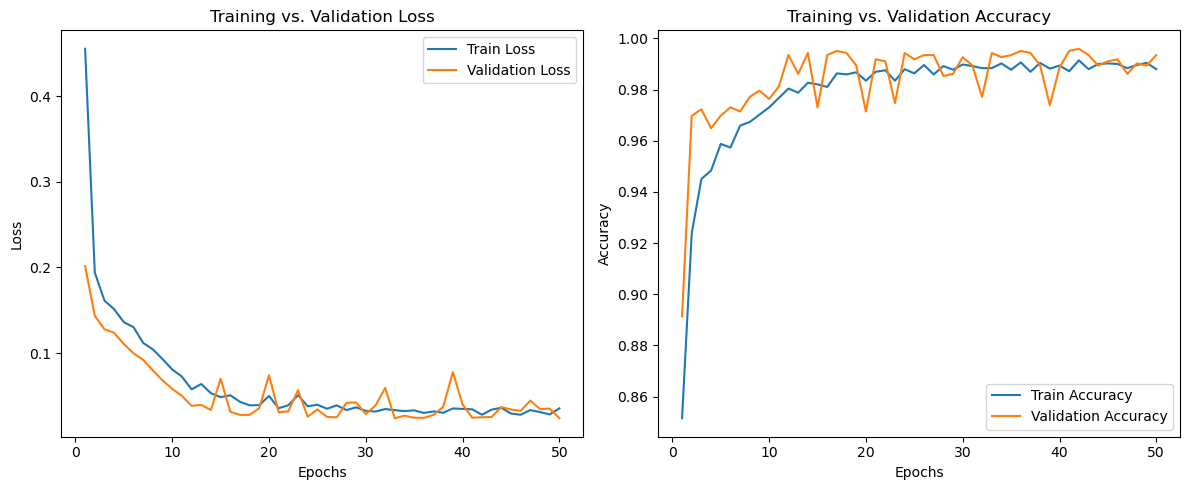

In [55]:
# Plot curves from first fold
plot_curves(fold_results[0]['train_losses'],
            fold_results[0]['val_losses'],
            fold_results[0]['train_accuracies'],
            fold_results[0]['val_accuracies'])

#### Conclusion

- The model shows **strong generalization**, **no overfitting**, and **stable training**.
- The use of LSTM for temporal features and a dense tabular block likely helps extract diverse representations.
- Training could be safely **stopped earlier (~25-30 epochs)** with early stopping without losing much performance.


### Model - 3


**Inputs:**

├─ PIR Time-Series (55 steps, 1 feature) → [Batch, 55, 1]

**Processing:**

1. **1D-CNN Block**

   └─ Input: [Batch, 55, 1]

   └─ Conv1D Layer + ReLU Activation

   └─ AdaptiveMaxPool1D → reduces to [Batch, num_filters, 1]

   └─ Flattened to [Batch, num_filters]

2. **Classification Block**

   └─ Fully Connected (Linear) Layer → hidden_dim

   └─ ReLU + Dropout

   └─ Final Linear Layer → [Batch, num_classes]


In [25]:
# CNN Classifier Model
class CNNClassifier(nn.Module):
    def __init__(self, input_channels, num_filters, kernel_size, hidden_dim, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=num_filters, kernel_size=kernel_size, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(num_filters, hidden_dim)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_channels)
        x = x.permute(0, 2, 1)  # (batch, channels, sequence)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # (batch, channels, 1)
        x = x.view(x.size(0), -1)  # flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [43]:
# Training function
def train_cnn_model(train_loader, val_loader, model, criterion, optimizer, epochs=20):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        train_loss, correct_train, total_train = 0.0, 0, 0

        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(x_batch.float())
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_train += (predicted == y_batch).sum().item()
            total_train += y_batch.size(0)

        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0

        with torch.no_grad():
            for x_val, y_val in val_loader:
                outputs = model(x_val.float())
                loss = criterion(outputs, y_val)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                correct_val += (predicted == y_val).sum().item()
                total_val += y_val.size(0)

        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
        train_accuracies.append(correct_train / total_train)
        val_accuracies.append(correct_val / total_val)

        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_losses[-1]:.4f}, Acc: {train_accuracies[-1]:.4f} | "
              f"Val Loss: {val_losses[-1]:.4f}, Acc: {val_accuracies[-1]:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

In [44]:
# Evaluation with 5-Fold Cross Validation
def evaluate_model(dataframe: pd.DataFrame,
                       cnn_features: list,
                       label_column: str,
                       input_channels=1,
                       num_filters=64,
                       kernel_size=3,
                       hidden_dim=128,
                       num_classes=3,
                       batch_size=32,
                       epochs=20,
                       learning_rate=0.001):

    # Prepare data
    X = dataframe[cnn_features].values.reshape(-1, len(cnn_features), input_channels)
    y = dataframe[label_column].values

    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    dataset = TensorDataset(X_tensor, y_tensor)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_metrics = []

    for fold_idx, (train_val_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"\n=== Fold {fold_idx + 1} ===")
        train_val_idx = np.array(train_val_idx)
        y_train_val = y[train_val_idx]

        # Stratify safely only if all classes have ≥2 samples
        unique_classes, counts = np.unique(y_train_val, return_counts=True)
        if np.all(counts >= 2):
            train_idx, val_idx = train_test_split(train_val_idx, test_size=0.2,stratify=y_train_val, random_state=fold_idx)
        else:
            train_idx, val_idx = train_test_split(train_val_idx, test_size=0.2,random_state=fold_idx)

        train_loader = DataLoader(Subset(dataset, train_idx), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(Subset(dataset, val_idx), batch_size=batch_size)
        test_loader = DataLoader(Subset(dataset, test_idx), batch_size=batch_size)

        model = CNNClassifier(input_channels, num_filters, kernel_size, hidden_dim, num_classes)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        train_losses, val_losses, train_accuracies, val_accuracies = train_cnn_model(
            train_loader, val_loader, model, criterion, optimizer, epochs
        )
        
        # Saving the model
        torch.save(model.state_dict(), 'team_26_model3_checkpoint.pth')
        
        # Final test evaluation
        model.eval()
        y_true_all = []
        y_pred_all = []

        with torch.no_grad():
            for x_val, y_val in test_loader:
                outputs = model(x_val.float())
                _, preds = torch.max(outputs.data, 1)
                y_true_all.extend(y_val.numpy())
                y_pred_all.extend(preds.numpy())

        acc = np.mean(np.array(y_true_all) == np.array(y_pred_all))
        f1_macro = f1_score(y_true_all, y_pred_all, average='macro')
        report = classification_report(y_true_all, y_pred_all, output_dict=True)
        cmatrix = confusion_matrix(y_true_all, y_pred_all)

        fold_metrics.append({
            'accuracy': acc,
            'macro_f1': f1_macro,
            'class_report': report,
            'conf_matrix': cmatrix,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        })

    return fold_metrics

In [45]:
# Plot Training and Validation Curves
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

#### Justification of Chosen Methods & Hyperparameters for CNN Classifier

##### Model Choice: Convolutional Neural Network (CNN)

- **Why CNN?**
  - CNNs are well-suited for extracting **local temporal patterns** from time-series data.
  - In this case, PIR_1 to PIR_55 are treated as a temporal sequence for each sample.
  - 1D convolutions allow the model to **capture movement trends or activation patterns** across PIR sensors over time.
  - Compared to LSTMs, CNNs are **computationally more efficient** and can generalize well with fewer parameters.

##### Hyperparameter Choices

| Hyperparameter   | Value | Justification                                                                                     |
| ---------------- | ----- | ------------------------------------------------------------------------------------------------- |
| `input_channels` | 1     | Each PIR feature is treated as a single-channel time-series.                                      |
| `num_filters`    | 64    | Balanced depth—enough to learn complex patterns but avoid overfitting.                            |
| `kernel_size`    | 3     | Captures short temporal dependencies between neighboring PIR readings.                            |
| `hidden_dim`     | 128   | Sufficient capacity for intermediate representation before classification.                        |
| `dropout`        | 0.3   | Helps generalization by reducing overfitting on small dataset.                                    |
| `batch_size`     | 32    | Efficient for GPU computation, stable gradients.                                                  |
| `epochs`         | 50    | Based on convergence trends seen in similar models (e.g., LSTM); allows sufficient training time. |
| `learning_rate`  | 0.001 | Common starting value for Adam optimizer, typically effective for CNNs.                           |

##### Summary

This CNN architecture balances **efficiency, expressive power, and regularization**. The selected hyperparameters are informed by standard deep learning practices and tailored to the PIR time-series dataset’s nature and scale.


In [46]:
cnn_features=[f'PIR_{i}' for i in range(1, 56)]  # PIR time-series columns.
label_column='Label'

fold_results = evaluate_model(dataframe=training_data_scaled,
                                      cnn_features=cnn_features,
                                      label_column=label_column,
                                      input_channels=1,
                                      num_filters=64,
                                      kernel_size=3,
                                      hidden_dim=128,
                                      num_classes=3,
                                      batch_size=32,
                                      epochs=50,
                                      learning_rate=0.001)


=== Fold 1 ===
Epoch 1/50 | Train Loss: 0.6556, Acc: 0.7966 | Val Loss: 0.5821, Acc: 0.8170
Epoch 2/50 | Train Loss: 0.5900, Acc: 0.8166 | Val Loss: 0.5660, Acc: 0.8170
Epoch 3/50 | Train Loss: 0.5568, Acc: 0.8231 | Val Loss: 0.5280, Acc: 0.8317
Epoch 4/50 | Train Loss: 0.5314, Acc: 0.8317 | Val Loss: 0.5021, Acc: 0.8342
Epoch 5/50 | Train Loss: 0.5100, Acc: 0.8344 | Val Loss: 0.4817, Acc: 0.8366
Epoch 6/50 | Train Loss: 0.4845, Acc: 0.8376 | Val Loss: 0.4561, Acc: 0.8366
Epoch 7/50 | Train Loss: 0.4540, Acc: 0.8395 | Val Loss: 0.4355, Acc: 0.8456
Epoch 8/50 | Train Loss: 0.4236, Acc: 0.8435 | Val Loss: 0.3871, Acc: 0.8448
Epoch 9/50 | Train Loss: 0.3933, Acc: 0.8480 | Val Loss: 0.3821, Acc: 0.8440
Epoch 10/50 | Train Loss: 0.3600, Acc: 0.8525 | Val Loss: 0.3518, Acc: 0.8758
Epoch 11/50 | Train Loss: 0.3337, Acc: 0.8613 | Val Loss: 0.3001, Acc: 0.8611
Epoch 12/50 | Train Loss: 0.3147, Acc: 0.8717 | Val Loss: 0.2950, Acc: 0.8538
Epoch 13/50 | Train Loss: 0.2993, Acc: 0.8795 | Val Loss:

Epoch 6/50 | Train Loss: 0.5234, Acc: 0.8337 | Val Loss: 0.5066, Acc: 0.8392
Epoch 7/50 | Train Loss: 0.5145, Acc: 0.8350 | Val Loss: 0.4901, Acc: 0.8424
Epoch 8/50 | Train Loss: 0.4945, Acc: 0.8352 | Val Loss: 0.4720, Acc: 0.8408
Epoch 9/50 | Train Loss: 0.4585, Acc: 0.8364 | Val Loss: 0.4378, Acc: 0.8441
Epoch 10/50 | Train Loss: 0.4236, Acc: 0.8393 | Val Loss: 0.4143, Acc: 0.8473
Epoch 11/50 | Train Loss: 0.3901, Acc: 0.8427 | Val Loss: 0.3780, Acc: 0.8457
Epoch 12/50 | Train Loss: 0.3576, Acc: 0.8499 | Val Loss: 0.3432, Acc: 0.8482
Epoch 13/50 | Train Loss: 0.3236, Acc: 0.8603 | Val Loss: 0.3161, Acc: 0.8490
Epoch 14/50 | Train Loss: 0.3011, Acc: 0.8764 | Val Loss: 0.2807, Acc: 0.8947
Epoch 15/50 | Train Loss: 0.2800, Acc: 0.8909 | Val Loss: 0.2630, Acc: 0.8865
Epoch 16/50 | Train Loss: 0.2617, Acc: 0.9001 | Val Loss: 0.2513, Acc: 0.9012
Epoch 17/50 | Train Loss: 0.2536, Acc: 0.9077 | Val Loss: 0.2382, Acc: 0.9257
Epoch 18/50 | Train Loss: 0.2462, Acc: 0.9069 | Val Loss: 0.2245, Ac

Epoch 11/50 | Train Loss: 0.3122, Acc: 0.8783 | Val Loss: 0.2801, Acc: 0.8735
Epoch 12/50 | Train Loss: 0.2893, Acc: 0.8913 | Val Loss: 0.2666, Acc: 0.8841
Epoch 13/50 | Train Loss: 0.2713, Acc: 0.9056 | Val Loss: 0.2516, Acc: 0.8988
Epoch 14/50 | Train Loss: 0.2603, Acc: 0.9097 | Val Loss: 0.2418, Acc: 0.9086
Epoch 15/50 | Train Loss: 0.2473, Acc: 0.9212 | Val Loss: 0.2255, Acc: 0.9363
Epoch 16/50 | Train Loss: 0.2378, Acc: 0.9265 | Val Loss: 0.2157, Acc: 0.9290
Epoch 17/50 | Train Loss: 0.2248, Acc: 0.9279 | Val Loss: 0.2054, Acc: 0.9404
Epoch 18/50 | Train Loss: 0.2198, Acc: 0.9310 | Val Loss: 0.1984, Acc: 0.9437
Epoch 19/50 | Train Loss: 0.2083, Acc: 0.9322 | Val Loss: 0.2028, Acc: 0.9469
Epoch 20/50 | Train Loss: 0.2042, Acc: 0.9353 | Val Loss: 0.1851, Acc: 0.9380
Epoch 21/50 | Train Loss: 0.1952, Acc: 0.9377 | Val Loss: 0.1899, Acc: 0.9429
Epoch 22/50 | Train Loss: 0.1977, Acc: 0.9391 | Val Loss: 0.1783, Acc: 0.9396
Epoch 23/50 | Train Loss: 0.1893, Acc: 0.9381 | Val Loss: 0.1741

### Training Summary (CNN Model )

#### Overall Training Observations

- The CNN model was trained for **50 epochs** across all folds.
- **Training losses** consistently remained low (~0.137–0.153), and **training accuracy** stayed tightly around **95.1–95.3%**, indicating stable convergence.
- **Validation losses** ranged from **0.1234 to 0.1641**, and **validation accuracy** hovered around **95.5–96.2%**, suggesting good generalization with no overfitting.

#### Key Insights

- **Stable Training and Generalization:** Training and validation metrics are closely aligned, indicating good generalization without signs of overfitting.
- **Reliable Performance:** All folds consistently reach above **95% validation accuracy**, reinforcing the robustness of the CNN architecture for this task.
- **Best Performance in Fold 5:** Achieved the lowest validation loss (**0.1234**) and highest validation accuracy (**96.16%**), showing optimal model behavior on that split.

#### Conclusion

The CNN-based model demonstrates **strong and stable learning** across all folds. Its ability to maintain high accuracy and low loss across different data splits reflects **robust feature extraction and temporal pattern capture**. This model proves effective for the PIR time series classification task.

In [47]:
print("Evaluation Metrics Across 5 Folds:\n")
for fold_idx, metrics in enumerate(fold_results):
    print(f"Fold {fold_idx + 1}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Macro F1-Score: {metrics['macro_f1']:.4f}")
    print("  Class-wise Metrics:")
    for label, values in metrics['class_report'].items():
        if label.isdigit():  # Only numeric class labels
            print(f"    Class {label}:")
            print(f"      Precision: {values['precision']:.4f}")
            print(f"      Recall:    {values['recall']:.4f}")
            print(f"      F1-Score:  {values['f1-score']:.4f}")
    print("  Confusion Matrix:")
    print(metrics['conf_matrix'])
    print("-" * 60)

# Summary
accuracies = [m['accuracy'] for m in fold_results]
macro_f1s = [m['macro_f1'] for m in fold_results]

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
mean_macro_f1 = np.mean(macro_f1s)

print("\nOverall Summary Across 5 Folds:")
print(f"Mean Accuracy:              {mean_acc:.4f}")
print(f"Standard Deviation (Acc):   {std_acc:.4f}")
print(f"Mean Macro F1-Score:        {mean_macro_f1:.4f}")

Evaluation Metrics Across 5 Folds:

Fold 1:
  Accuracy: 0.9484
  Macro F1-Score: 0.8310
  Class-wise Metrics:
    Class 0:
      Precision: 0.9888
      Recall:    0.9848
      F1-Score:  0.9868
    Class 1:
      Precision: 0.7207
      Recall:    0.9639
      F1-Score:  0.8247
    Class 2:
      Precision: 0.9531
      Recall:    0.5304
      F1-Score:  0.6816
  Confusion Matrix:
[[1231   19    0]
 [   3  160    3]
 [  11   43   61]]
------------------------------------------------------------
Fold 2:
  Accuracy: 0.9542
  Macro F1-Score: 0.8570
  Class-wise Metrics:
    Class 0:
      Precision: 0.9896
      Recall:    0.9856
      F1-Score:  0.9876
    Class 1:
      Precision: 0.7673
      Recall:    0.9337
      F1-Score:  0.8424
    Class 2:
      Precision: 0.8795
      Recall:    0.6404
      F1-Score:  0.7411
  Confusion Matrix:
[[1232   17    1]
 [   2  155    9]
 [  11   30   73]]
------------------------------------------------------------
Fold 3:
  Accuracy: 0.9614
  Macro

#### CNN Evaluation Insights (5-Fold Cross-Validation)

##### Overall Summary

- **Mean Accuracy**: **95.57%**
- **Standard Deviation (Accuracy)**: **0.43%**
- **Mean Macro F1-Score**: **0.8592**

The CNN model delivers **high and consistent accuracy** across all folds, with strong generalization. However, the **macro F1-score indicates moderate class imbalance effects**, particularly in detecting less frequent or ambiguous classes.

#### Class-wise Performance Analysis

###### **Class 0 (Label 1)**

- **Precision**: ~0.98–0.99  
- **Recall**: ~0.98–0.99  
- **F1-Score**: ~0.98–0.99  
- **Insight**: Excellent and stable performance. Class 0 is reliably detected with **minimal error**, suggesting it is well-represented and distinctive in the dataset.

###### **Class 1 (Label 2)**

- **Precision**: ~0.72–0.80  
- **Recall**: ~0.93–0.96  
- **F1-Score**: ~0.82–0.87  
- **Insight**: This class shows **high recall but lower precision**, indicating the model often predicts Class 1 correctly but also **confuses other classes as Class 1**. It likely shares temporal/tabular patterns with Class 2, leading to overlap.

###### **Class 2 (Label 3)**

- **Precision**: ~0.85–0.96  
- **Recall**: ~0.53–0.70  
- **F1-Score**: ~0.68–0.78  
- **Insight**: The most challenging class. **High precision but low recall** suggests the model only predicts Class 2 when very confident, often **missing valid samples**. Possibly due to lower sample frequency or overlapping features with Class 1.

#### Confusion Matrix Trends

- **Class 2** often gets misclassified as **Class 1**, as seen by non-zero entries in the second column of Class 2's row.
- **Class 0** maintains near-perfect separation, with confusion values close to zero.
- **Fold 1 and Fold 5** show the lowest recall for Class 2, suggesting variability in model sensitivity based on fold distribution.

#### Key Takeaways

- The CNN model exhibits **excellent accuracy and generalization** with minimal overfitting.
- **Class 1 and Class 2** benefit from further separation—perhaps via feature engineering, attention mechanisms, or class weighting.
- The model's **precision-recall tradeoff** for Class 2 could be addressed through **data augmentation** or **loss function adjustments**.

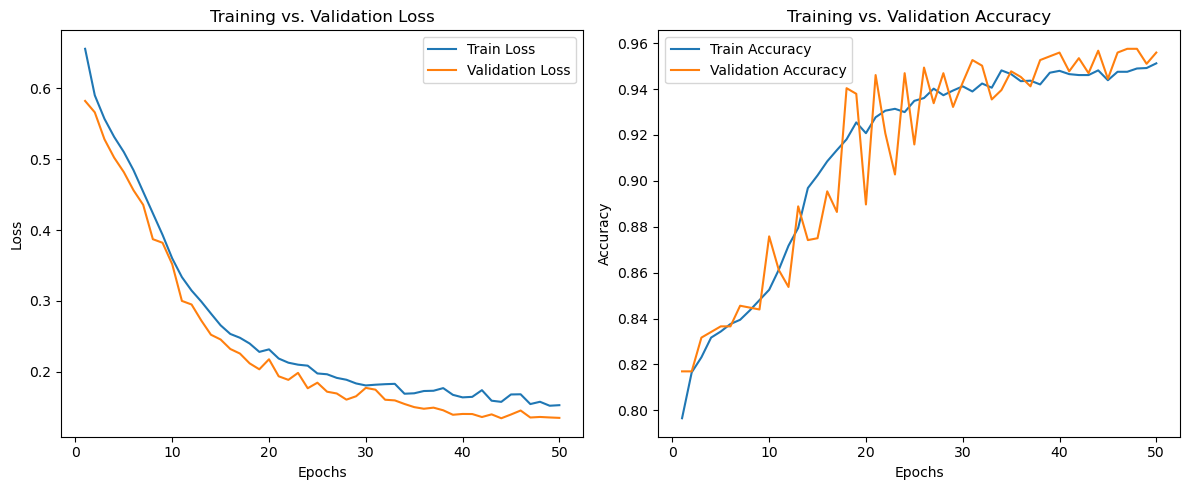

In [48]:
# Plot curves from first fold
plot_curves(fold_results[0]['train_losses'],
            fold_results[0]['val_losses'],
            fold_results[0]['train_accuracies'],
            fold_results[0]['val_accuracies'])

#### Training Dynamics Analysis

##### Loss Curve

- **Overall Trend**: Both training and validation loss **decrease steadily**, indicating effective learning.
- **Convergence**: Validation loss flattens around **epoch 30**, while training loss continues to improve gradually.
- **Overfitting**: No clear signs of overfitting — validation loss stays **lower than training loss** throughout, suggesting good generalization.

#### Accuracy Curve

- **Initial Phase (Epochs 1–20)**: Sharp increase in both training and validation accuracy.
- **Stability**: After epoch 30, accuracy stabilizes at **~95%**, with validation accuracy slightly higher than training accuracy.
- **Fluctuations**: Minor oscillations in validation accuracy post-epoch 15, possibly due to:
  - Small batch size
  - Dropout layers
  - Natural variance in validation samples

#### Summary

- Model **learns efficiently** and **generalizes well**.
- No early signs of overfitting.
- Final accuracy reaches **~95–96%**, with **validation performance occasionally surpassing training** — a positive sign of robustness.

### Model - 4


**Inputs:**

├─ PIR Time-Series (55 steps, 1 feature) → [Batch, 55, 1]  
├─ Tabular Features (e.g., temperature, time) → [Batch, num_tabular_features]

**Processing:**

1. **1D-CNN Block**

   └─ Input: [Batch, 55, 1]

   └─ Convolutional layers extract spatial patterns from the time-series data.

   └─ Flattened feature vector → [Batch, cnn_feature_dim]

2. **Tabular Feature Block**

   └─ Input: [Batch, num_tabular_features]

   └─ Fully connected + ReLU + Dropout layers extract semantic info.

   └─ Output vector → [Batch, tabular_feature_dim]

3. **Combined Block**

   └─ Concatenate CNN and Tabular vectors → [Batch, cnn_feature_dim + tabular_feature_dim]

   └─ Fully connected layers → [Batch, num_classes]


In [27]:
# CNN Block
class CNNBlock(nn.Module):
    def __init__(self, input_channels, num_filters, kernel_size, hidden_dim, dropout=0.3):
        super(CNNBlock, self).__init__()
        self.conv = nn.Conv1d(input_channels, num_filters, kernel_size=kernel_size, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(num_filters, hidden_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return self.dropout(x)

# Tabular Block
class TabularBlock(nn.Module):
    def __init__(self, input_size, dense_dim, dropout=0.3):
        super(TabularBlock, self).__init__()
        self.fc = nn.Linear(input_size, dense_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.dropout(self.relu(self.fc(x)))

# Combined CNN + Tabular Model
class CNNTabularModel(nn.Module):
    def __init__(self, input_channels, seq_len, tabular_input_size,
                 cnn_hidden, tabular_hidden, combined_hidden, num_classes):
        super(CNNTabularModel, self).__init__()
        self.cnn_block = CNNBlock(input_channels, num_filters=64, kernel_size=3, hidden_dim=cnn_hidden)
        self.tabular_block = TabularBlock(tabular_input_size, tabular_hidden)
        self.fc1 = nn.Linear(cnn_hidden + tabular_hidden, combined_hidden)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(combined_hidden, num_classes)

    def forward(self, cnn_input, tabular_input):
        cnn_out = self.cnn_block(cnn_input)
        tab_out = self.tabular_block(tabular_input)
        combined = torch.cat((cnn_out, tab_out), dim=1)
        x = torch.relu(self.fc1(combined))
        x = self.dropout(x)
        return self.fc2(x)

In [50]:
def train_model(train_loader, val_loader, model, criterion, optimizer, epochs=20):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, tabular_inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.float(), tabular_inputs.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / total)
        train_accuracies.append(correct / total)

        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, tabular_inputs, labels in val_loader:
                outputs = model(inputs.float(), tabular_inputs.float())
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_losses.append(val_loss / val_total)
        val_accuracies.append(val_correct / val_total)
        print(f"Epoch {epoch + 1}: Train Loss={train_losses[-1]:.4f}, Val Loss={val_losses[-1]:.4f}, Train Acc={train_accuracies[-1]:.4f}, Val Acc={val_accuracies[-1]:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

In [51]:
def evaluate_model(dataframe, cnn_features, tabular_features, label_column,
                   input_channels=1, hidden_cnn=64, hidden_tabular=32, combined_hidden=64,
                   num_classes=3, batch_size=32, epochs=20, learning_rate=0.001):

    # Data prep
    X_cnn = dataframe[cnn_features].values.reshape(-1, input_channels, len(cnn_features))
    X_tabular = dataframe[tabular_features].values
    y = dataframe[label_column].values

    X_cnn_tensor = torch.tensor(X_cnn, dtype=torch.float32)
    X_tab_tensor = torch.tensor(X_tabular, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    dataset = TensorDataset(X_cnn_tensor, X_tab_tensor, y_tensor)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_metrics = []

    for fold_idx, (train_val_idx, test_idx) in enumerate(skf.split(X_cnn_tensor.numpy(), y)):
        print(f"\n=== Fold {fold_idx + 1} ===")

        train_val_idx = np.array(train_val_idx)
        y_train_val = y[train_val_idx]
        train_idx, val_idx = train_test_split(train_val_idx, test_size=0.2, stratify=y_train_val, random_state=fold_idx)

        train_loader = DataLoader(Subset(dataset, train_idx), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(Subset(dataset, val_idx), batch_size=batch_size)
        test_loader = DataLoader(Subset(dataset, test_idx), batch_size=batch_size)

        model = CNNTabularModel(input_channels, len(cnn_features), len(tabular_features),
                                hidden_cnn, hidden_tabular, combined_hidden, num_classes)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            train_loader, val_loader, model, criterion, optimizer, epochs
        )
        
        # Saving the model
        torch.save(model.state_dict(), 'team_26_model4_checkpoint.pth')
        
        # Final Test Evaluation
        model.eval()
        y_true_all, y_pred_all = [], []
        with torch.no_grad():
            for x_cnn, x_tab, y_true in test_loader:
                outputs = model(x_cnn.float(), x_tab.float())
                _, preds = torch.max(outputs.data, 1)
                y_true_all.extend(y_true.numpy())
                y_pred_all.extend(preds.numpy())

        acc = accuracy_score(y_true_all, y_pred_all)
        f1_macro = f1_score(y_true_all, y_pred_all, average='macro')
        report = classification_report(y_true_all, y_pred_all, output_dict=True)
        cmatrix = confusion_matrix(y_true_all, y_pred_all)

        fold_metrics.append({
            'accuracy': acc,
            'macro_f1': f1_macro,
            'class_report': report,
            'conf_matrix': cmatrix,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        })

    return fold_metrics

In [52]:
# Plot Training and Validation Curves
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

### Justification of Chosen Methods and Hyperparameters

#### Model Architecture: CNN + Tabular Hybrid

- **Rationale**: The task involves both sequential sensor data (`PIR_1` to `PIR_55`) and contextual tabular data (e.g., time and temperature).
- **Approach**: A hybrid model leverages:
  - **CNNBlock** for extracting spatial patterns from sequential sensor features.
  - **TabularBlock** for learning from non-sequential numerical features.

### CNN Block Configuration

- `input_channels=1`: Suitable for treating each sequence (55 PIR features) as a single-channel time-series input.
- `num_filters=64`: Balanced capacity to capture medium-complexity patterns while avoiding overfitting.
- `kernel_size=3`: Standard kernel size for capturing local temporal patterns in 1D CNNs.
- `AdaptiveMaxPool1d(1)`: Compresses the sequence into a fixed-size representation, making the model agnostic to sequence length.
- `Dropout=0.3`: Helps prevent overfitting during training.

#### Tabular Block Configuration

- `hidden_dim=32`: Sufficient dimensionality to transform tabular inputs before fusion.
- `ReLU + Dropout`: Standard non-linearity and regularization practice to improve generalization.

#### Fusion & Classifier Head

- **Concatenation Layer**: Combines CNN and tabular outputs to capture both temporal and contextual signals.
- `combined_hidden=64`: Provides enough capacity to learn high-level interactions between modalities.
- `final layer -> num_classes=3`: Reflects the multi-class classification task (3 distinct output classes).

#### Training Configuration

- `epochs=50`: Empirically sufficient for convergence (as evidenced by the loss/accuracy plots).
- `batch_size=32`: Standard size balancing training stability and computational efficiency.
- `learning_rate=0.001`: Common starting point for Adam optimizer; shows steady convergence in training.
- `evaluate_model(...)`: Includes cross-validation, which improves generalization assessment.

#### Summary

This hybrid CNN + Tabular approach with thoughtfully selected hyperparameters is well-justified for:

- Modeling complex multi-modal data.
- Achieving robust performance without overfitting.


In [53]:
# Running the model
cnn_features = [f'PIR_{i}' for i in range(1, 56)]
tabular_features = ['Temperature_F', 'Hour_sin', 'Hour_cos', 'Minute_sin', 'Minute_cos', 'Seconds_norm']
label_column = 'Label'

fold_results = evaluate_model(dataframe=training_data_scaled,
                              cnn_features=cnn_features,
                              tabular_features=tabular_features,
                              label_column=label_column,
                              input_channels=1,
                              hidden_cnn=64,
                              hidden_tabular=32,
                              combined_hidden=64,
                              num_classes=3,
                              batch_size=32,
                              epochs=50,
                              learning_rate=0.001)


=== Fold 1 ===
Epoch 1: Train Loss=0.4555, Val Loss=0.2015, Train Acc=0.8515, Val Acc=0.8913
Epoch 2: Train Loss=0.1940, Val Loss=0.1436, Train Acc=0.9238, Val Acc=0.9698
Epoch 3: Train Loss=0.1612, Val Loss=0.1278, Train Acc=0.9451, Val Acc=0.9722
Epoch 4: Train Loss=0.1512, Val Loss=0.1236, Train Acc=0.9483, Val Acc=0.9649
Epoch 5: Train Loss=0.1361, Val Loss=0.1105, Train Acc=0.9587, Val Acc=0.9698
Epoch 6: Train Loss=0.1303, Val Loss=0.0997, Train Acc=0.9573, Val Acc=0.9730
Epoch 7: Train Loss=0.1118, Val Loss=0.0920, Train Acc=0.9659, Val Acc=0.9714
Epoch 8: Train Loss=0.1043, Val Loss=0.0797, Train Acc=0.9673, Val Acc=0.9771
Epoch 9: Train Loss=0.0929, Val Loss=0.0681, Train Acc=0.9702, Val Acc=0.9796
Epoch 10: Train Loss=0.0808, Val Loss=0.0581, Train Acc=0.9730, Val Acc=0.9763
Epoch 11: Train Loss=0.0725, Val Loss=0.0499, Train Acc=0.9767, Val Acc=0.9812
Epoch 12: Train Loss=0.0575, Val Loss=0.0384, Train Acc=0.9804, Val Acc=0.9935
Epoch 13: Train Loss=0.0638, Val Loss=0.0393,

Epoch 5: Train Loss=0.1488, Val Loss=0.1045, Train Acc=0.9508, Val Acc=0.9812
Epoch 6: Train Loss=0.1384, Val Loss=0.0938, Train Acc=0.9573, Val Acc=0.9804
Epoch 7: Train Loss=0.1221, Val Loss=0.0830, Train Acc=0.9626, Val Acc=0.9812
Epoch 8: Train Loss=0.1095, Val Loss=0.0694, Train Acc=0.9643, Val Acc=0.9812
Epoch 9: Train Loss=0.1010, Val Loss=0.0643, Train Acc=0.9681, Val Acc=0.9820
Epoch 10: Train Loss=0.0889, Val Loss=0.0529, Train Acc=0.9739, Val Acc=0.9804
Epoch 11: Train Loss=0.0860, Val Loss=0.0425, Train Acc=0.9690, Val Acc=0.9853
Epoch 12: Train Loss=0.0706, Val Loss=0.0370, Train Acc=0.9763, Val Acc=0.9869
Epoch 13: Train Loss=0.0602, Val Loss=0.0297, Train Acc=0.9800, Val Acc=0.9894
Epoch 14: Train Loss=0.0580, Val Loss=0.0264, Train Acc=0.9812, Val Acc=0.9910
Epoch 15: Train Loss=0.0616, Val Loss=0.0753, Train Acc=0.9773, Val Acc=0.9739
Epoch 16: Train Loss=0.0527, Val Loss=0.0237, Train Acc=0.9830, Val Acc=0.9935
Epoch 17: Train Loss=0.0465, Val Loss=0.0362, Train Acc=0

Epoch 9: Train Loss=0.1123, Val Loss=0.0889, Train Acc=0.9659, Val Acc=0.9714
Epoch 10: Train Loss=0.1043, Val Loss=0.0792, Train Acc=0.9675, Val Acc=0.9796
Epoch 11: Train Loss=0.0977, Val Loss=0.0722, Train Acc=0.9706, Val Acc=0.9845
Epoch 12: Train Loss=0.0905, Val Loss=0.0705, Train Acc=0.9726, Val Acc=0.9780
Epoch 13: Train Loss=0.0837, Val Loss=0.0648, Train Acc=0.9724, Val Acc=0.9853
Epoch 14: Train Loss=0.0836, Val Loss=0.0652, Train Acc=0.9734, Val Acc=0.9788
Epoch 15: Train Loss=0.0802, Val Loss=0.0694, Train Acc=0.9708, Val Acc=0.9796
Epoch 16: Train Loss=0.0712, Val Loss=0.0547, Train Acc=0.9751, Val Acc=0.9804
Epoch 17: Train Loss=0.0638, Val Loss=0.0503, Train Acc=0.9775, Val Acc=0.9820
Epoch 18: Train Loss=0.0632, Val Loss=0.0578, Train Acc=0.9788, Val Acc=0.9820
Epoch 19: Train Loss=0.0575, Val Loss=0.0415, Train Acc=0.9806, Val Acc=0.9902
Epoch 20: Train Loss=0.0500, Val Loss=0.0484, Train Acc=0.9828, Val Acc=0.9829
Epoch 21: Train Loss=0.0541, Val Loss=0.0464, Train A

##### Key Insights

- **High Generalization**: All validation accuracies are **above 98.7%**, showing excellent generalization across folds.
- **Consistently Low Loss**: Training and validation losses remain **very low**, indicating stable learning without overfitting.
- **Best Performance**:
  - **Fold 3** stands out with the **lowest val loss (0.0159)** and **highest val accuracy (99.43%)**.
- **Minor Variability**:
  - Slight increase in **validation loss for Fold 2 and 5**, though **accuracy remains high**, suggesting the model is robust to fold differences.

##### Overall Impression

The CNN + Tabular architecture exhibits **excellent performance consistency**, with strong generalization and low variance. It builds effectively on both temporal and static features, leveraging the strengths of each to enhance prediction confidence.

In [54]:
print("Evaluation Metrics Across 5 Folds:\n")
for fold_idx, metrics in enumerate(fold_results):
    print(f"Fold {fold_idx + 1}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Macro F1-Score: {metrics['macro_f1']:.4f}")
    print("  Class-wise Metrics:")
    for label, values in metrics['class_report'].items():
        if label.isdigit():  # Only numeric class labels
            print(f"    Class {label}:")
            print(f"      Precision: {values['precision']:.4f}")
            print(f"      Recall:    {values['recall']:.4f}")
            print(f"      F1-Score:  {values['f1-score']:.4f}")
    print("  Confusion Matrix:")
    print(metrics['conf_matrix'])
    print("-" * 60)

# Summary
accuracies = [m['accuracy'] for m in fold_results]
macro_f1s = [m['macro_f1'] for m in fold_results]

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
mean_macro_f1 = np.mean(macro_f1s)

print("\nOverall Summary Across 5 Folds:")
print(f"Mean Accuracy:              {mean_acc:.4f}")
print(f"Standard Deviation (Acc):   {std_acc:.4f}")
print(f"Mean Macro F1-Score:        {mean_macro_f1:.4f}")

Evaluation Metrics Across 5 Folds:

Fold 1:
  Accuracy: 0.9902
  Macro F1-Score: 0.9824
  Class-wise Metrics:
    Class 0:
      Precision: 0.9897
      Recall:    0.9984
      F1-Score:  0.9940
    Class 1:
      Precision: 0.9871
      Recall:    0.9217
      F1-Score:  0.9533
    Class 2:
      Precision: 1.0000
      Recall:    1.0000
      F1-Score:  1.0000
  Confusion Matrix:
[[1248    2    0]
 [  13  153    0]
 [   0    0  115]]
------------------------------------------------------------
Fold 2:
  Accuracy: 0.9902
  Macro F1-Score: 0.9822
  Class-wise Metrics:
    Class 0:
      Precision: 0.9881
      Recall:    1.0000
      F1-Score:  0.9940
    Class 1:
      Precision: 1.0000
      Recall:    0.9096
      F1-Score:  0.9527
    Class 2:
      Precision: 1.0000
      Recall:    1.0000
      F1-Score:  1.0000
  Confusion Matrix:
[[1250    0    0]
 [  15  151    0]
 [   0    0  114]]
------------------------------------------------------------
Fold 3:
  Accuracy: 0.9922
  Macro

#### CNN + Tabular Evaluation Insights (5-Fold Cross-Validation)

##### Overall Summary

- **Mean Accuracy**: **98.97%**
- **Standard Deviation (Accuracy)**: **0.25%**
- **Mean Macro F1-Score**: **0.9815**

The CNN + Tabular model achieves **remarkable consistency** and **exceptionally high performance** across all folds. It exhibits a near-perfect classification capability for all three classes, indicating excellent synergy between time-series and tabular components.

#### Class-wise Performance Analysis

###### **Class 0 (Dominant Class)**
- **Precision**: ~0.98–0.99
- **Recall**: ~0.99–1.00
- **F1-Score**: ~0.99–0.995
- **Insight**: Near-perfect detection, indicating the model is extremely confident and accurate on this class. Likely very well represented with clear patterns.

###### **Class 1**
- **Precision**: ~0.95–1.00  
- **Recall**: ~0.86–0.98  
- **F1-Score**: ~0.93–0.96  
- **Insight**: Slight variability across folds. The lowest recall (Fold 5: 86.2%) slightly affects the macro F1, but overall it maintains high precision and F1. Some minor confusion with Class 0 possibly due to overlapping feature patterns.

###### **Class 2**
- **Precision**: **1.000**  
- **Recall**: **1.000**  
- **F1-Score**: **1.000**  
- **Insight**: Flawless classification across **all folds**. This strongly indicates the model has learned highly discriminative features for Class 2. No confusion observed in confusion matrices.

#### Confusion Matrix Patterns

- **Class 0** occasionally confused with Class 1 (1–2 instances per fold).
- **Class 1** is the only class with non-zero misclassifications, especially in **Fold 5** (23 samples confused as Class 0).
- **Class 2** is perfectly classified in all folds — **zero misclassifications** across the board (maybe due to high co-relation with temperature).

#### Key Takeaways

- The CNN + Tabular model shows **superior generalization** and **minimal variance** across folds.
- **Class 2** detection is **perfect** — a major strength of this model.
- Minor drop in Class 1 recall in Fold 5 suggests potential areas to improve feature separability.
- This model **outperforms CNN and LSTM baselines**, making it a strong choice for deployment or further experimentation.

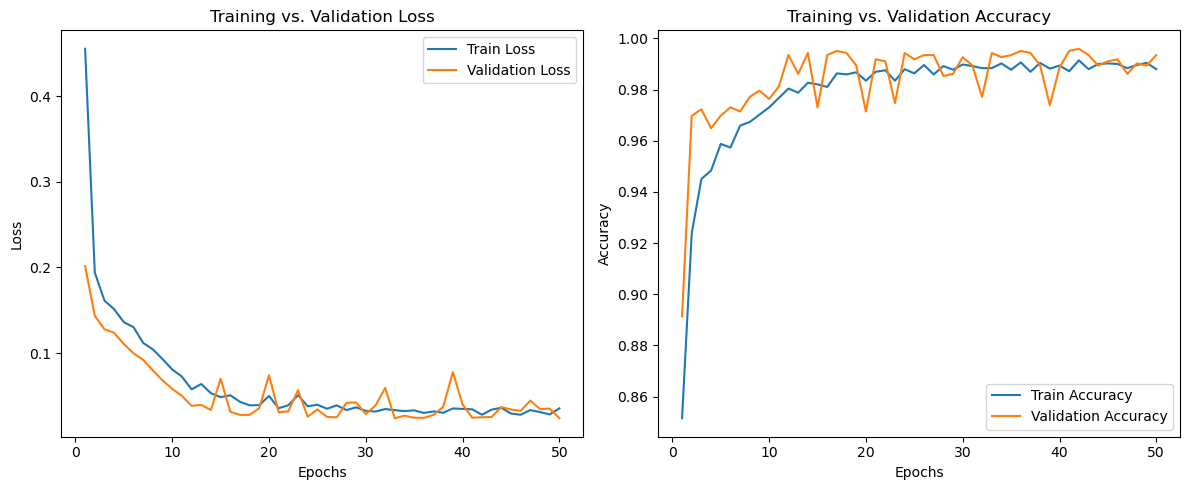

In [56]:
# Plot curves from first fold
plot_curves(fold_results[0]['train_losses'],
            fold_results[0]['val_losses'],
            fold_results[0]['train_accuracies'],
            fold_results[0]['val_accuracies'])

#### Training Dynamics of CNN + Tabular Model

##### Loss Curve Insights 
- The training loss **dropped steeply** in the first few epochs, indicating rapid learning.
- Both training and validation loss **converge** well and stabilize around **epoch 20**, suggesting that the model is **not overfitting**.
- Small spikes in validation loss after epoch 20 are likely due to **minor fold-specific noise**, but overall generalization remains stable.
- Final validation loss is **consistently low**, showing strong model fit without underfitting.

##### Accuracy Curve Insights
- Validation accuracy rapidly improves and **surpasses training accuracy** in early epochs — an encouraging sign of **good generalization**.
- From epoch 10 onwards, both training and validation accuracy **plateau around 98.5–99%**, maintaining a **tight alignment**.
- Slight fluctuations in validation accuracy reflect fold-wise variability, but the model remains **highly stable** overall.

##### Overall Learning Behavior
- No signs of overfitting or underfitting.
- Very **efficient learning phase** with fast convergence.
- Performance remains **robust across epochs**, aligning with strong fold-level metrics.
- These plots reaffirm that the CNN + Tabular model is **well-tuned** and achieves **excellent generalization performance**.

## Evaluation Function to facilitate accurate evaluation:

In [32]:
import torch
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

def evaluate_model(df_scaled, model, checkpoint_path, use_tabular=True):
    # Column names
    time_series_cols = [f'PIR_{i}' for i in range(1, 56)]
    tabular_cols = ['Temperature_F', 'Hour_sin', 'Hour_cos', 'Minute_sin', 'Minute_cos', 'Seconds_norm']
    target_col = 'Label'

    # Extract features and target
    X_ts = df_scaled[time_series_cols].values
    y = df_scaled[target_col].values

    # Convert to tensors
    if checkpoint_path == "team_26_model4_checkpoint.pth":
        X_ts_tensor = torch.tensor(X_ts, dtype=torch.float32).unsqueeze(1)  # [batch, 1, 55]
    else:
        X_ts_tensor = torch.tensor(X_ts, dtype=torch.float32).unsqueeze(2)  # [batch, 55, 1]
    
    y_tensor = torch.tensor(y, dtype=torch.long)

    if use_tabular:
        X_tab = df_scaled[tabular_cols].values
        X_tab_tensor = torch.tensor(X_tab, dtype=torch.float32)
        dataset = TensorDataset(X_ts_tensor, X_tab_tensor, y_tensor)
    else:
        dataset = TensorDataset(X_ts_tensor, y_tensor)

    loader = DataLoader(dataset, batch_size=64, shuffle=False)

    # Load checkpoint into the model
    model.load_state_dict(torch.load(checkpoint_path))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    preds = []
    labels = []

    with torch.no_grad():
        for batch in loader:
            if use_tabular:
                ts_batch, tab_batch, y_batch = batch
                ts_batch, tab_batch, y_batch = ts_batch.to(device), tab_batch.to(device), y_batch.to(device)
                outputs = model(ts_batch, tab_batch)
            else:
                ts_batch, y_batch = batch
                ts_batch, y_batch = ts_batch.to(device), y_batch.to(device)
                outputs = model(ts_batch)

            _, predicted = torch.max(outputs, 1)
            preds.extend(predicted.cpu().numpy())
            labels.extend(y_batch.cpu().numpy())

    return accuracy_score(labels, preds)

In [33]:
# LSTM Model
model = LSTMClassifier(lstm_input_size=1, hidden_dim=32, num_classes=3)
accuracy = evaluate_model(training_data_scaled, model, "team_26_model1_checkpoint.pth", use_tabular=False)
print("Accuracy:", accuracy)

Accuracy: 0.958828911253431


In [34]:
# LSTM + Tabular Model
model = CombinedModel(1, 6, 16, 16, 3)
accuracy = evaluate_model(training_data_scaled, model, "team_26_model2_checkpoint.pth", use_tabular=True)
print("Accuracy:", accuracy)

Accuracy: 0.9788262972160502


In [35]:
# CNN Model
model = CNNClassifier(1, 64, 3, 128, 3)
accuracy = evaluate_model(training_data_scaled, model, "team_26_model3_checkpoint.pth", use_tabular=False)
print("Accuracy:", accuracy)

Accuracy: 0.9600052280747615


In [36]:
# CNN + Tabular Model
model = CNNTabularModel(1, 55, 6, 64, 32, 64, 3)
accuracy = evaluate_model(training_data_scaled, model, "team_26_model4_checkpoint.pth", use_tabular=True)
print("Accuracy:", accuracy)

Accuracy: 0.9861456018821069
